# i. Perkenalan

Nama : Satriya Fauzan Adhim

Batch : FTDS-019-RMT

Objective : The objective is to develop a robust and accurate churn prediction model that can be used to identify customers at risk of churn. This will enable the company to take proactive measures, such as targeted marketing campaigns, personalized offers, or improved customer service, to retain customers and reduce churn.

# ii. Import Libraries

In [97]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, MinMaxScaler, LabelEncoder, OneHotEncoder
from imblearn.over_sampling import SMOTENC
from feature_engine.outliers import Winsorizer
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, accuracy_score, f1_score, ConfusionMatrixDisplay
from phik import phik_matrix

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
import tensorflow as tf
from tensorflow.keras.layers import Input

from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Input, Dense, Dropout, concatenate
from statsmodels.stats.outliers_influence import variance_inflation_factor

import pickle, joblib
import json

import warnings
warnings.filterwarnings("ignore")

# iii. Data Loading

In [98]:
data = pd.read_csv("https://raw.githubusercontent.com/kodokgodog/Latihan_hactiv8/main/churn.csv")

data.head(5)

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,...,1184.49,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,...,338.15,7665.66,17.0,575.97,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,235.14,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads,0
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,...,56.67,15678.14,11.0,590.22,No,Yes,No,Not Applicable,Too many ads,1
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,...,153.99,8422.68,0.0,722.04,Yes,No,No,Not Applicable,Poor Product Quality,0


In [99]:
data.tail(10)

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
37000,8a0fff47b7846031,25,F,Town,No Membership,2017-01-20,No,Gift Vouchers/Coupons,Smartphone,Wi-Fi,...,119.830000,13147.91,0.0,1019.382051,Yes,No,Yes,Solved in Follow-up,Poor Product Quality,1
37001,8832eec42dc0e347,38,M,Town,Silver Membership,2016-09-19,NaN,Credit/Debit Card Offers,Smartphone,Wi-Fi,...,34.790000,30820.83,23.0,631.830000,Yes,No,Yes,Unsolved,Poor Customer Service,1
37002,b9d9761f4d367c7a,49,F,City,No Membership,2017-12-12,NaN,Without Offers,Both,Wi-Fi,...,499.510000,17110.71,24.0,587.010000,Yes,No,No,Not Applicable,Poor Customer Service,1
37003,a38816e7522f5f7b,42,F,Town,Basic Membership,2017-07-05,Yes,Gift Vouchers/Coupons,Both,Wi-Fi,...,529.580000,42964.11,18.0,619.280000,Yes,Yes,No,Not Applicable,Poor Product Quality,1
37004,8968d0458164dda9,19,F,Town,Gold Membership,2016-07-17,Yes,Without Offers,Smartphone,Fiber_Optic,...,119.960000,14218.43,7.0,781.840000,Yes,No,No,Not Applicable,Too many ads,0
37005,924e9c06f0c73817,36,M,Town,Gold Membership,2015-03-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,199.330000,29455.29,9.0,846.520000,Yes,Yes,No,Not Applicable,User Friendly Website,0
37006,90e22286ac0acf04,27,F,City,Gold Membership,2017-01-15,Yes,Without Offers,Desktop,Wi-Fi,...,368.500000,27038.47,8.0,835.980000,No,Yes,No,Not Applicable,Reasonable Price,0
37007,9329a6297407334a,20,M,NaN,Gold Membership,2015-07-11,Yes,Without Offers,NaN,Mobile_Data,...,272.130000,39305.35,27.0,714.900000,Yes,Yes,Yes,Solved,Poor Customer Service,0
37008,a4403ddda8fcf9f3,38,F,City,Gold Membership,2016-05-25,Yes,Without Offers,Desktop,Wi-Fi,...,65.070000,46108.73,6.0,744.990000,No,Yes,No,Not Applicable,Poor Website,0
37009,93b5d0330d24fa15,36,M,Town,Gold Membership,2016-10-18,NaN,Without Offers,Both,Fiber_Optic,...,972.776679,26905.49,22.0,700.930000,Yes,No,Yes,No Information Available,Poor Customer Service,1


In [100]:
data.shape

(37010, 22)

In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37010 entries, 0 to 37009
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   user_id                       37010 non-null  object 
 1   age                           37010 non-null  int64  
 2   gender                        36951 non-null  object 
 3   region_category               31579 non-null  object 
 4   membership_category           37010 non-null  object 
 5   joining_date                  37010 non-null  object 
 6   joined_through_referral       31568 non-null  object 
 7   preferred_offer_types         36722 non-null  object 
 8   medium_of_operation           31615 non-null  object 
 9   internet_option               37010 non-null  object 
 10  last_visit_time               37010 non-null  object 
 11  days_since_last_login         37010 non-null  int64  
 12  avg_time_spent                37010 non-null  float64
 13  a

# iv. Exploratory Data Analysis (EDA)

In [102]:
# Copying Dataset

df = data.copy()

## 4.1 Checking Duplication Data

In [103]:
df.duplicated().sum()

18

In [104]:
df.drop_duplicates(inplace=True)

In [105]:
df.duplicated().sum()

0

No more duplicated data on dataset.

## 4.2 Checking Missing Value

In [106]:
df.isnull().sum()

user_id                            0
age                                0
gender                            59
region_category                 5428
membership_category                0
joining_date                       0
joined_through_referral         5438
preferred_offer_types            288
medium_of_operation             5393
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                   0
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

In [107]:
# Amount of row containing missing value
jumlah_missing = data.isnull().sum().sum()

print("Row containing missing value", jumlah_missing)

Row containing missing value 16615


In [108]:
# Checking the column list
kolom = df.columns.tolist()

print(kolom)

['user_id', 'age', 'gender', 'region_category', 'membership_category', 'joining_date', 'joined_through_referral', 'preferred_offer_types', 'medium_of_operation', 'internet_option', 'last_visit_time', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet', 'used_special_discount', 'offer_application_preference', 'past_complaint', 'complaint_status', 'feedback', 'churn_risk_score']


## 4.3 Statistik Deskriptif

In [109]:
# Statistik Deskriptif
print(df.describe())

                age  days_since_last_login  avg_time_spent  \
count  36992.000000           36992.000000    36992.000000   
mean      37.118161             -41.915576      279.147450   
std       15.867412             228.819900      329.947709   
min       10.000000            -999.000000        0.000000   
25%       23.000000               8.000000       60.102500   
50%       37.000000              12.000000      161.765000   
75%       51.000000              16.000000      356.515000   
max       64.000000              26.000000     3235.578521   

       avg_transaction_value  avg_frequency_login_days  points_in_wallet  \
count           36992.000000              36992.000000      36992.000000   
mean            29271.194003                 14.658617        623.562421   
std             19444.806226                  9.479184        270.263994   
min               800.460000                  0.000000          0.000000   
25%             14177.540000                  7.000000       

## 4.4 Amount of Unique Value in Every Column

In [110]:
# Calculate the amount of Unique Value in Every Column
unique_counts = df.nunique()

print(unique_counts)

user_id                         36992
age                                55
gender                              2
region_category                     3
membership_category                 6
joining_date                     1096
joined_through_referral             2
preferred_offer_types               3
medium_of_operation                 3
internet_option                     3
last_visit_time                 30101
days_since_last_login              27
avg_time_spent                  24243
avg_transaction_value           36894
avg_frequency_login_days          971
points_in_wallet                23564
used_special_discount               2
offer_application_preference        2
past_complaint                      2
complaint_status                    5
feedback                            9
churn_risk_score                    2
dtype: int64


Based on the unique values in each column above, we can determine which columns are categorical columns (columns with more than 15 unique values) and which columns are numerical.

## 4.5 Visualization

### 4.5.1 Number of Customer Churn

In [111]:
df.churn_risk_score.replace({0:'Not Churn',1:'Churn'}, inplace=True)
churn = df.churn_risk_score.value_counts().to_frame().reset_index()
churn

,index,churn_risk_score
0,Churn,20012
1,Not Churn,16980


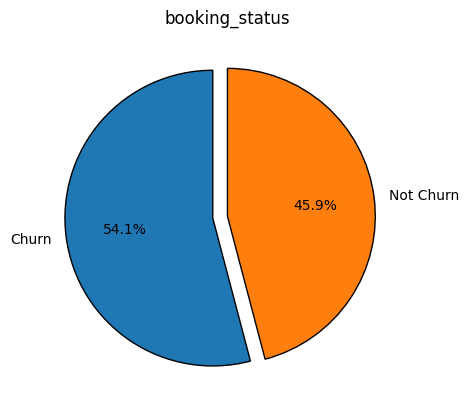

In [112]:
l = list(df['churn_risk_score'].value_counts())
circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]

plt.pie(circle,labels = ['Churn','Not Churn'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('booking_status')

plt.show()

From the visualization above, we can see that the amount of customer that gonna churn is higher compared to not churn. Those numbers will have a significant negative impact on the company's business, with churn rate exceeding more than half of the total customers. Based on the data percentage, we can also observe that the data distribution appears to be balanced.

###  4.5.2 Number of Customers Based on Their Membership

In [113]:
# membership category
membership_category = df.groupby(['churn_risk_score','membership_category']).aggregate(Number_of_customer_per_membership_category=('membership_category','count')).reset_index()
membership_category

,churn_risk_score,membership_category,Number_of_customer_per_membership_category
0,Churn,Basic Membership,7473
1,Churn,Gold Membership,2513
2,Churn,No Membership,7466
3,Churn,Silver Membership,2560
4,Not Churn,Basic Membership,251
5,Not Churn,Gold Membership,4282
6,Not Churn,No Membership,226
7,Not Churn,Platinum Membership,4338
8,Not Churn,Premium Membership,4455
9,Not Churn,Silver Membership,3428


In [114]:
# plotting bar plot
fig = px.bar(membership_category, x="membership_category", y="Number_of_customer_per_membership_category",color='churn_risk_score',color_discrete_sequence=['red','blue'],
             orientation="v",hover_name="membership_category"        
                
             )
fig.update_layout(title_text = "Number of customers based on their membership category")
fig.show()

Based on the visualization above, we can see that the majority of churned customers are either non-members or have low membership levels. Based on this data, a business strategy can be developed. For example, offering attractive promotions or offers specifically targeted at customers with low membership levels could be implemented. Additionally, providing promotions like offers for new members can also be effective.

By targeting these specific segments, the business can aim to retain existing customers with low membership levels and attract new customers through enticing offers. It is important to create personalized and compelling incentives to encourage customer loyalty and minimize churn.

###  4.5.3 Average Transaction Value

In [115]:
# average transaction value
avg_transaction_value = df.groupby(['churn_risk_score']).aggregate(avg_transaction_value=('avg_transaction_value','mean')).reset_index()
avg_transaction_value
     

,churn_risk_score,avg_transaction_value
0,Churn,25366.363813
1,Not Churn,33873.282446


In [116]:
# plotting bar plot
fig = px.bar(avg_transaction_value, x="churn_risk_score", y="avg_transaction_value",color='churn_risk_score',color_discrete_sequence=['red','blue'],
             orientation="v"       
                
             )
fig.update_layout(title_text = "Average Transaction Value")
fig.show()

Based on the visualization above, it can be observed that the average transaction value for customers who are likely to churn is quite high. Therefore, if this issue is not addressed, the company will face a significant negative impact, particularly in terms of high profit loss.

To mitigate this situation, the company could consider implementing retention strategies specifically targeting high-value customers. These strategies could include personalized offers, loyalty programs, or enhanced customer service tailored to their needs. By providing incentives and a positive customer experience, the company can encourage these customers to remain loyal and continue making high-value transactions.

###  4.5.4 Number of Customers Based on Their Region

In [117]:
# Region category
region_category = df.groupby(['churn_risk_score','region_category']).aggregate(Number_of_customer_per_region_category=('region_category','count')).reset_index()
region_category

,churn_risk_score,region_category,Number_of_customer_per_region_category
0,Churn,City,6969
1,Churn,Town,7658
2,Churn,Village,2406
3,Not Churn,City,5768
4,Not Churn,Town,6470
5,Not Churn,Village,2293


In [118]:
# plotting bar plot
fig = px.bar(region_category, x="region_category", y="Number_of_customer_per_region_category",color='churn_risk_score',color_discrete_sequence=['red','blue'],
             orientation="v",hover_name="region_category"        
                
             )
fig.update_layout(title_text = "Number of customers based on their region category")
fig.show()

We can see from the visualization, there's not significance differents between the proportion of customer region compared to the amount of customer that's gonna churn. But if we combine the town and city become the city customer, a lot of customer from city is gonna churn compared to customer in village.

###  4.5.6 Correlation Value

In [119]:
df.drop('user_id', axis=1, inplace=True)

In [120]:
# Column list
kolom = df.columns.tolist()

print(kolom)

['age', 'gender', 'region_category', 'membership_category', 'joining_date', 'joined_through_referral', 'preferred_offer_types', 'medium_of_operation', 'internet_option', 'last_visit_time', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet', 'used_special_discount', 'offer_application_preference', 'past_complaint', 'complaint_status', 'feedback', 'churn_risk_score']


In [121]:
temp = df[['age', 'gender', 'region_category', 'membership_category', 'joining_date', 'joined_through_referral', 'preferred_offer_types', 'medium_of_operation', 'internet_option','churn_risk_score']]

In [122]:
correlation_matrix = phik_matrix(temp)

interval columns not set, guessing: ['age']


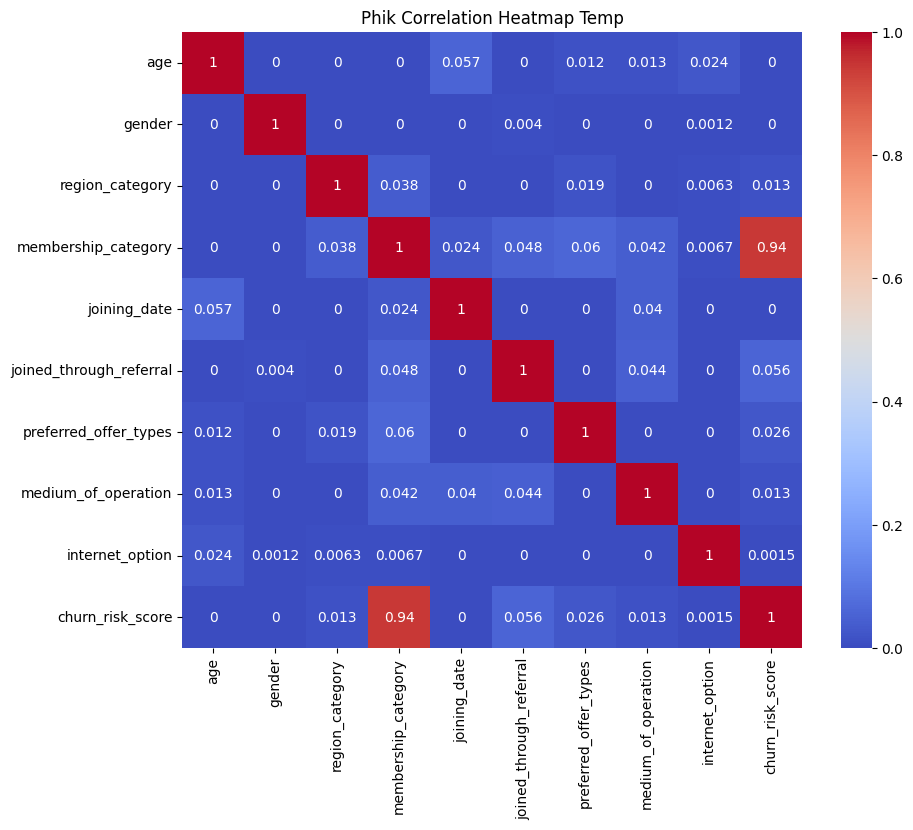

In [123]:
# Create heatmap from correlation_matrix temp
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Phik Correlation Heatmap Temp')
plt.show()

In [124]:
temp1 = df[['days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet', 'used_special_discount', 'offer_application_preference', 'past_complaint', 'complaint_status', 'feedback', 'churn_risk_score']]

In [125]:
correlation_matrix = phik_matrix(temp1)

interval columns not set, guessing: ['days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet']


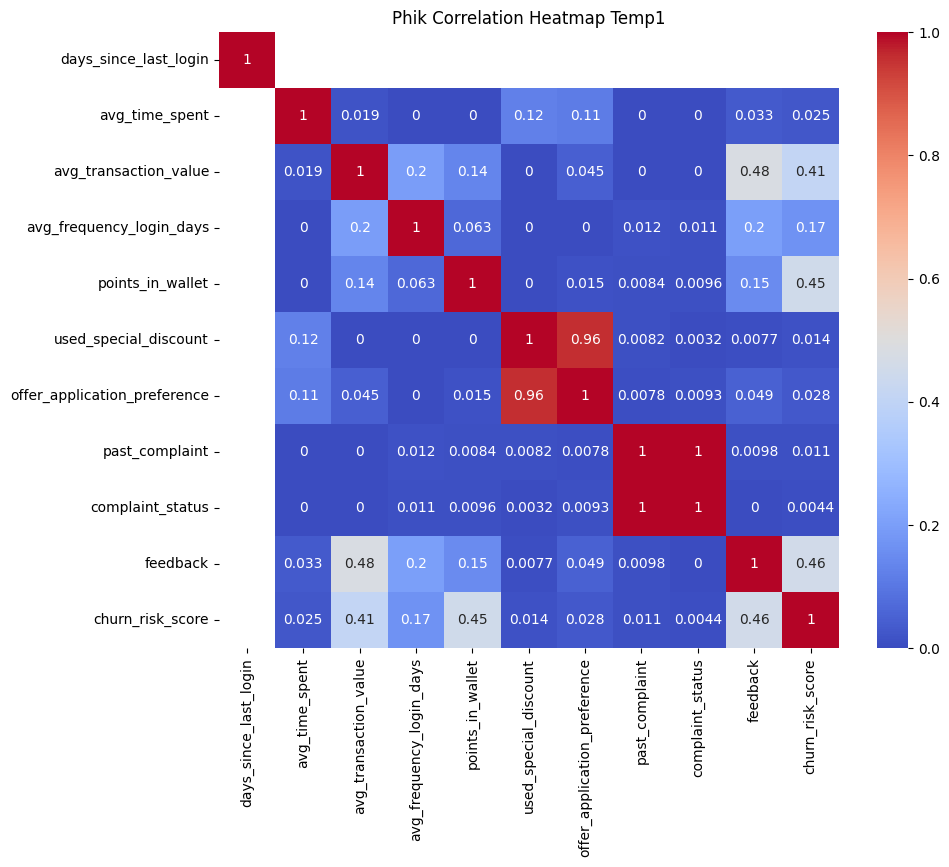

In [126]:
# Create heatmap from correlation_matrix temp
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Phik Correlation Heatmap Temp1')
plt.show()

From the correlation matrix above we can see a lot of variables doesn't have really good correlation to variable target. We can see the variables that got strong correlation score to target variable are 'membership_category', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet', and 'feedback'. And the variables that got at least some correlation to target varibale even though it really small are 'region_category', 'joined_through_referral', 'preferred_offer_types', 'medium_of_operation', 'internet_option', 'avg_time_spent','used_special_discount', 'offer_application_preference', 'past_complaint', and 'complaint_status'.

# v. Feature Engineering

In [127]:
df1 = data.copy()

In [128]:
# Get Numerical Columns and Categorical Columns

num_columns = df1.select_dtypes(include=np.number).columns.tolist()
cat_columns = df1.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns :  ['age', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet', 'churn_risk_score']
Categorical Columns :  ['user_id', 'gender', 'region_category', 'membership_category', 'joining_date', 'joined_through_referral', 'preferred_offer_types', 'medium_of_operation', 'internet_option', 'last_visit_time', 'used_special_discount', 'offer_application_preference', 'past_complaint', 'complaint_status', 'feedback']


## 5.1 Splitting between X and Y

This section is about separating dataset into training, test and validation set. 

In [129]:
# Defining X and y
X = df1.drop(['churn_risk_score'],axis=1)
y = pd.DataFrame(df1['churn_risk_score'])

In [130]:
# Split between Train-Set, Val-Set, and Test-Set

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15, random_state=0)

print('Train Size : ', X_train.shape)
print('Val Size : ', X_val.shape)
print('Test Size : ', X_test.shape)

Train Size :  (26739, 21)
Val Size :  (4719, 21)
Test Size :  (5552, 21)


In [131]:
X_train_num = X_train.select_dtypes(include=np.number)
X_train_cat = X_train.select_dtypes(include=['object'])

## 5.2 Data Distribution

Data distribution of Numerical Variable only, to check if it skewed or not.

In [132]:
def diagnostic_plots(df1, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df1[variable], bins=20)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df1[variable])
    plt.title('Boxplot')

    plt.show()

def find_normal_boundaries(df1, var):
    upper_boundary = df1[var].mean() + 3 * df1[var].std()
    lower_boundary = df1[var].mean() - 3 * df1[var].std()

    return upper_boundary, lower_boundary

def percentage_outlier(df1, var, upper_boundary, lower_boundary):
    outlier_right_tail = (len(df1[df1[var] > upper_boundary]) / len(df1) * 100)
    outlier_left_tail = (len(df1[df1[var] < lower_boundary]) / len(df1) * 100)
    return outlier_right_tail, outlier_left_tail



Variable: age


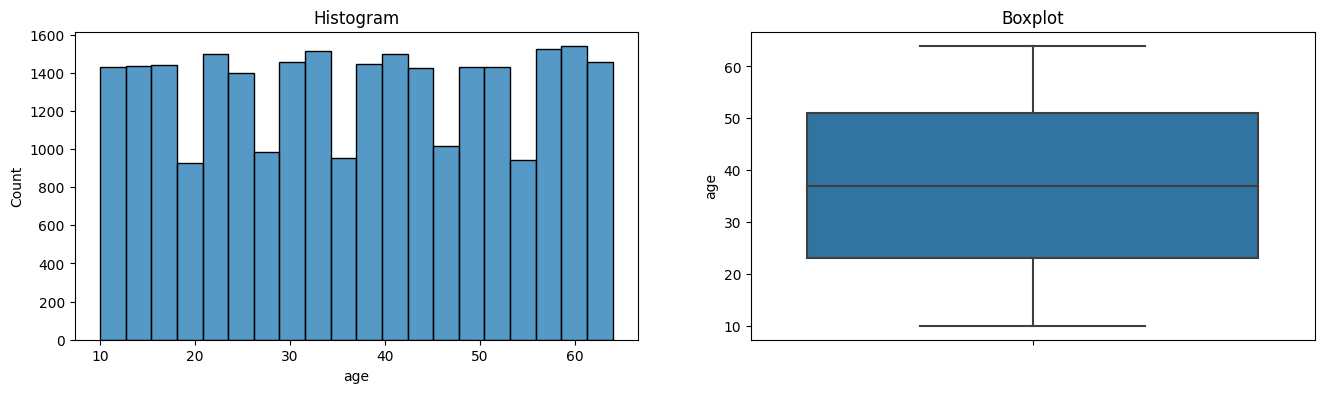

Skewness Value: -0.009648855286048868
Upper Boundary: 84.78895804730531
Lower Boundary: -10.45379218470761
% right end outliers: 0.0
% left end outliers: 0.0
Normal Distribution
--------------------

Variable: days_since_last_login


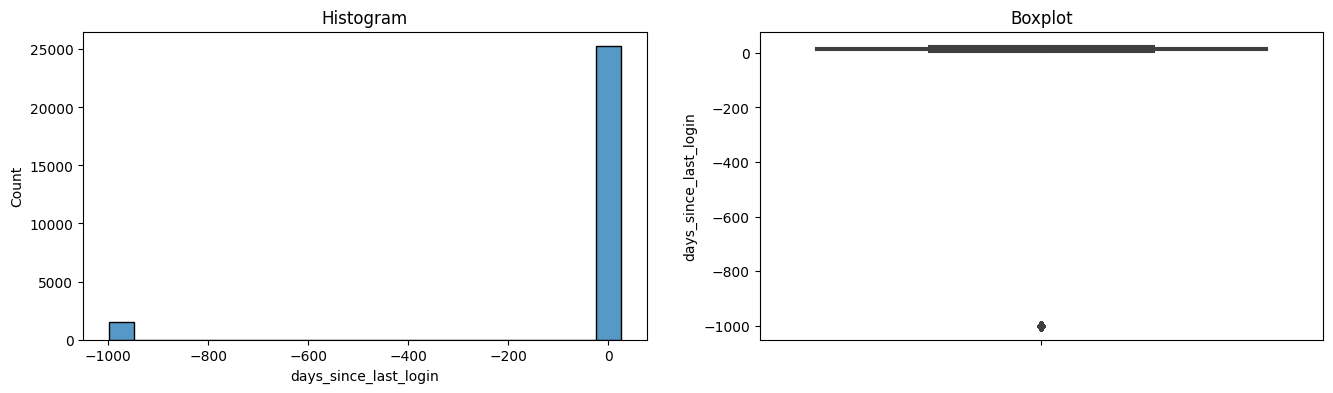

Skewness Value: -3.884208658103271
Upper Boundary: 651.1613707934371
Lower Boundary: -737.761393232571
% right end outliers: 0.0
% left end outliers: 5.53872620516848
Skewed Distribution
--------------------

Variable: avg_time_spent


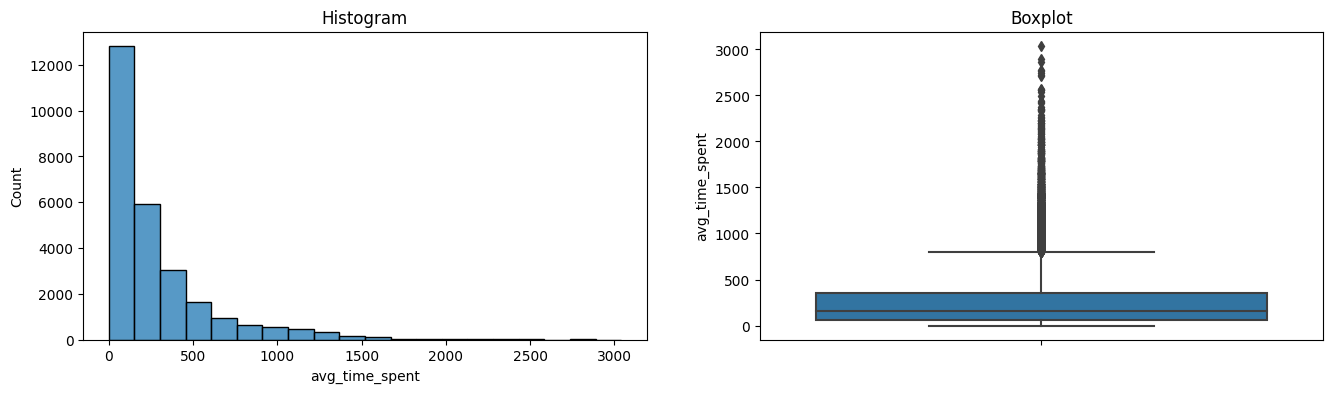

Skewness Value: 2.2777802620440784
Upper Boundary: 1262.3903441396337
Lower Boundary: -705.9804227811517
% right end outliers: 2.1728561277534686
% left end outliers: 0.0
Skewed Distribution
--------------------

Variable: avg_transaction_value


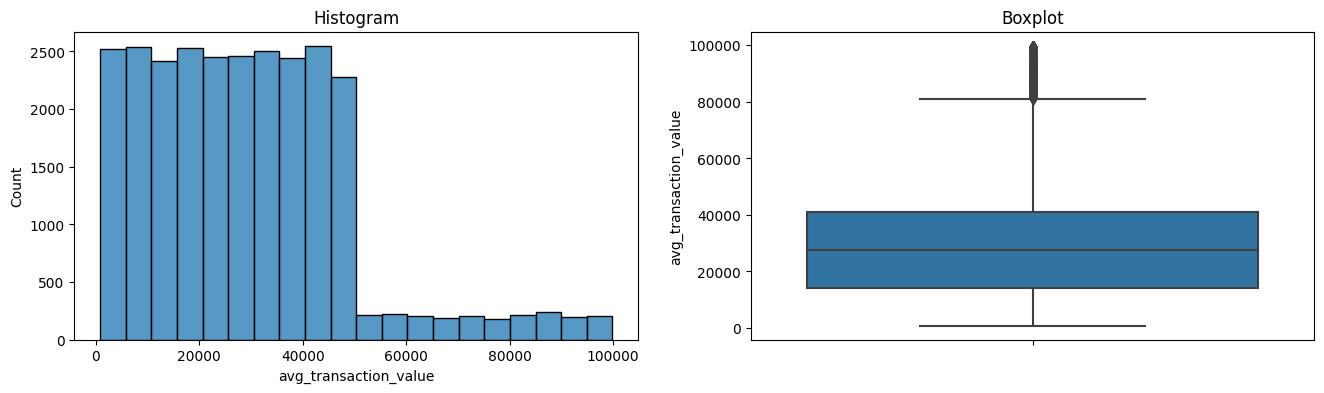

Skewness Value: 1.0114967056719604
Upper Boundary: 87574.69392851825
Lower Boundary: -29201.02311509964
% right end outliers: 1.9110662328434125
% left end outliers: 0.0
Skewed Distribution
--------------------

Variable: avg_frequency_login_days


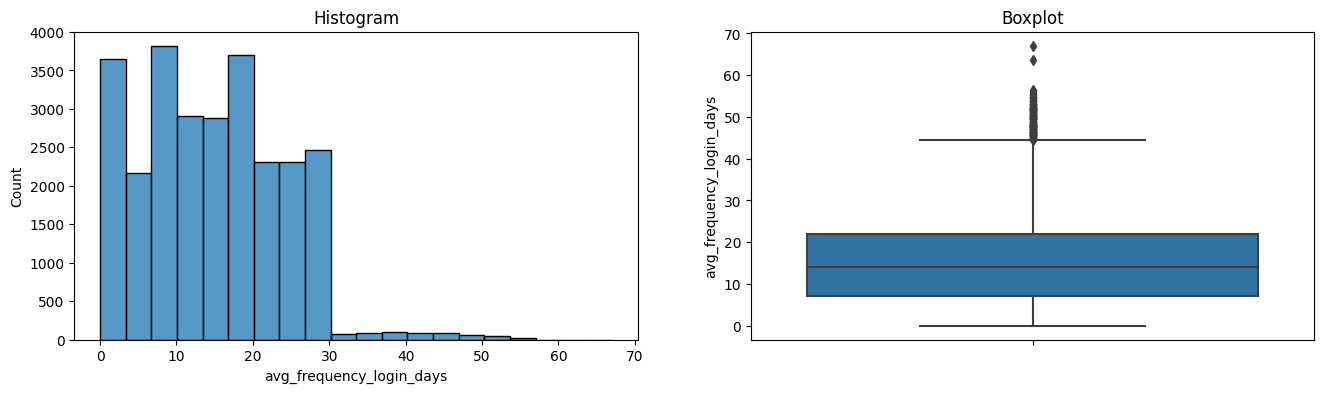

Skewness Value: 0.3984651394063655
Upper Boundary: 43.18426775157529
Lower Boundary: -13.854195422011275
% right end outliers: 0.8713863644863309
% left end outliers: 0.0
Normal Distribution
--------------------

Variable: points_in_wallet


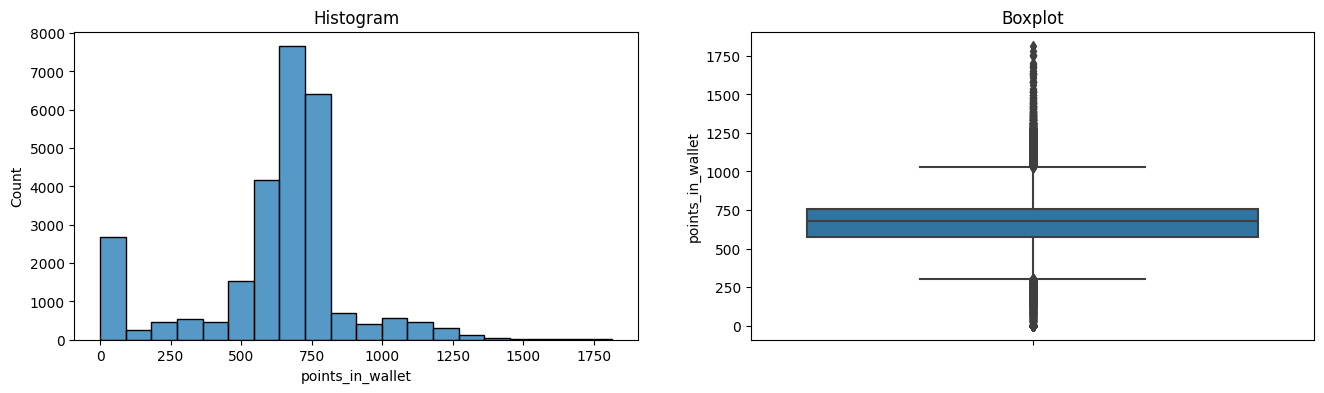

Skewness Value: -0.7828590603120053
Upper Boundary: 1432.002512619556
Lower Boundary: -184.83111194513697
% right end outliers: 0.20569206028647294
% left end outliers: 0.0
Skewed Distribution
--------------------


In [133]:
variables = X_train_num

for variable in variables:
    print(f"\nVariable: {variable}")
    diagnostic_plots(X_train, variable)
    print('Skewness Value:', X_train[variable].skew())
    
    upper_boundary, lower_boundary = find_normal_boundaries(X_train, variable)
    print('Upper Boundary:', upper_boundary)
    print('Lower Boundary:', lower_boundary)

    outlier_right_tail, outlier_left_tail = percentage_outlier(X_train, variable, upper_boundary, lower_boundary)
    print(f"% right end outliers: {outlier_right_tail}")
    print(f"% left end outliers: {outlier_left_tail}")

    if (X_train[variable].skew() <= -0.5) | (X_train[variable].skew() >= 0.5):
        print('Skewed Distribution')
        print('-'*20)
    else:
        print('Normal Distribution')
        print('-'*20)


Only variable 'age' and 'avg_frequency_login_days' that have normal distribution. For variables that got normal distribution, StandardScaler will be used to scale the value and then MinMaxScaler can be used to scale the value of variables that got skewed distribution.

## 5.3 Handling Missing Values

In [134]:
# Check Missing Values in X_train

X_train.isnull().sum()

user_id                            0
age                                0
gender                            42
region_category                 3929
membership_category                0
joining_date                       0
joined_through_referral         3886
preferred_offer_types            209
medium_of_operation             3906
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                   0
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
dtype: int64

In [135]:
# Check Missing Values in X_val

X_val.isnull().sum()

user_id                           0
age                               0
gender                            7
region_category                 701
membership_category               0
joining_date                      0
joined_through_referral         719
preferred_offer_types            38
medium_of_operation             674
internet_option                   0
last_visit_time                   0
days_since_last_login             0
avg_time_spent                    0
avg_transaction_value             0
avg_frequency_login_days          0
points_in_wallet                  0
used_special_discount             0
offer_application_preference      0
past_complaint                    0
complaint_status                  0
feedback                          0
dtype: int64

In [136]:
# Check Missing Values in X_test

X_test.isnull().sum()

user_id                           0
age                               0
gender                           10
region_category                 801
membership_category               0
joining_date                      0
joined_through_referral         837
preferred_offer_types            41
medium_of_operation             815
internet_option                   0
last_visit_time                   0
days_since_last_login             0
avg_time_spent                    0
avg_transaction_value             0
avg_frequency_login_days          0
points_in_wallet                  0
used_special_discount             0
offer_application_preference      0
past_complaint                    0
complaint_status                  0
feedback                          0
dtype: int64

We can see that the missing value on the data set only appeared on the categorical columns. Because of that we're gonna use 'unknown' value to fill the missing value with fillna(), we're inputing the missing value because of the sum of missing value is about 16615 from total of 37010 data. So we try to impute the missing value. 

In [137]:
# check categorical columns
print('categorical columns: ',cat_columns)

categorical columns:  ['user_id', 'gender', 'region_category', 'membership_category', 'joining_date', 'joined_through_referral', 'preferred_offer_types', 'medium_of_operation', 'internet_option', 'last_visit_time', 'used_special_discount', 'offer_application_preference', 'past_complaint', 'complaint_status', 'feedback']


In [138]:
# Melihat daftar kolom
kolom = df.columns.tolist()

# Menampilkan daftar kolom
print(kolom)

['age', 'gender', 'region_category', 'membership_category', 'joining_date', 'joined_through_referral', 'preferred_offer_types', 'medium_of_operation', 'internet_option', 'last_visit_time', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet', 'used_special_discount', 'offer_application_preference', 'past_complaint', 'complaint_status', 'feedback', 'churn_risk_score']


In [139]:
# Fill missing values in categorical data with 'Unknown'
X_train = X_train.fillna({'gender':'Unknown','region_category':'Unknown','joined_through_referral':'Unknown','preferred_offer_types':'Unknown','medium_of_operation':'Unknown'})
X_val = X_val.fillna({'gender':'Unknown','region_category':'Unknown','joined_through_referral':'Unknown','preferred_offer_types':'Unknown','medium_of_operation':'Unknown'})
X_test = X_test.fillna({'gender':'Unknown','region_category':'Unknown','joined_through_referral':'Unknown','preferred_offer_types':'Unknown','medium_of_operation':'Unknown'})
X_train.isnull().sum()

user_id                         0
age                             0
gender                          0
region_category                 0
membership_category             0
joining_date                    0
joined_through_referral         0
preferred_offer_types           0
medium_of_operation             0
internet_option                 0
last_visit_time                 0
days_since_last_login           0
avg_time_spent                  0
avg_transaction_value           0
avg_frequency_login_days        0
points_in_wallet                0
used_special_discount           0
offer_application_preference    0
past_complaint                  0
complaint_status                0
feedback                        0
dtype: int64

There's no missing value anymore.

## 5.4 Outliers Handling

In [140]:
def outlier_analysis(df1, col):
  skewness = df1[col].skew()
  if skewness >= -0.5 and skewness <= 0.5:
    upper = df1[col].mean() + 3 * df1[col].std()
    lower = df1[col].mean() - 3 * df1[col].std()
  else:
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1

    upper = Q3 + (1.5 * IQR)
    lower = Q1 - (1.5 * IQR)
    
  no_outliers = df1[(df1[col] >= lower) & (df1[col] <= upper)]
  outliers = df1[(df1[col] > upper) | (df1[col] < lower)]
  
  return outliers, no_outliers


In [141]:
columns = ['age', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet']

for col in columns:
    outliers, no_outliers = outlier_analysis(X_train, col)
    
    if len(outliers) > 0:
        print(f'Column name: {col}')
        print('Count of outliers:', len(outliers))
        print('Percentage of outliers:', (len(outliers) / len(X_train)) * 100, '%')
    else:
        print(f'Column name: {col}')
        print('No outliers found')
    
    print('-' * 20)


Column name: age
No outliers found
--------------------
Column name: days_since_last_login
Count of outliers: 1481
Percentage of outliers: 5.53872620516848 %
--------------------
Column name: avg_time_spent
Count of outliers: 2240
Percentage of outliers: 8.377276637121806 %
--------------------
Column name: avg_transaction_value
Count of outliers: 813
Percentage of outliers: 3.0405026365982275 %
--------------------
Column name: avg_frequency_login_days
Count of outliers: 233
Percentage of outliers: 0.8713863644863309 %
--------------------
Column name: points_in_wallet
Count of outliers: 4834
Percentage of outliers: 18.078462171360187 %
--------------------


We're gonna use Capping method to handling the outliers because of the amount of outliers is kinda high. Winsorizer library is used to Capping the outliers.

In [142]:
# capping outlier if exist and in large proportion
wins = Winsorizer(capping_method='iqr', tail='both', fold=1.5)
wins.fit(X_train)
X_train = wins.transform(X_train)

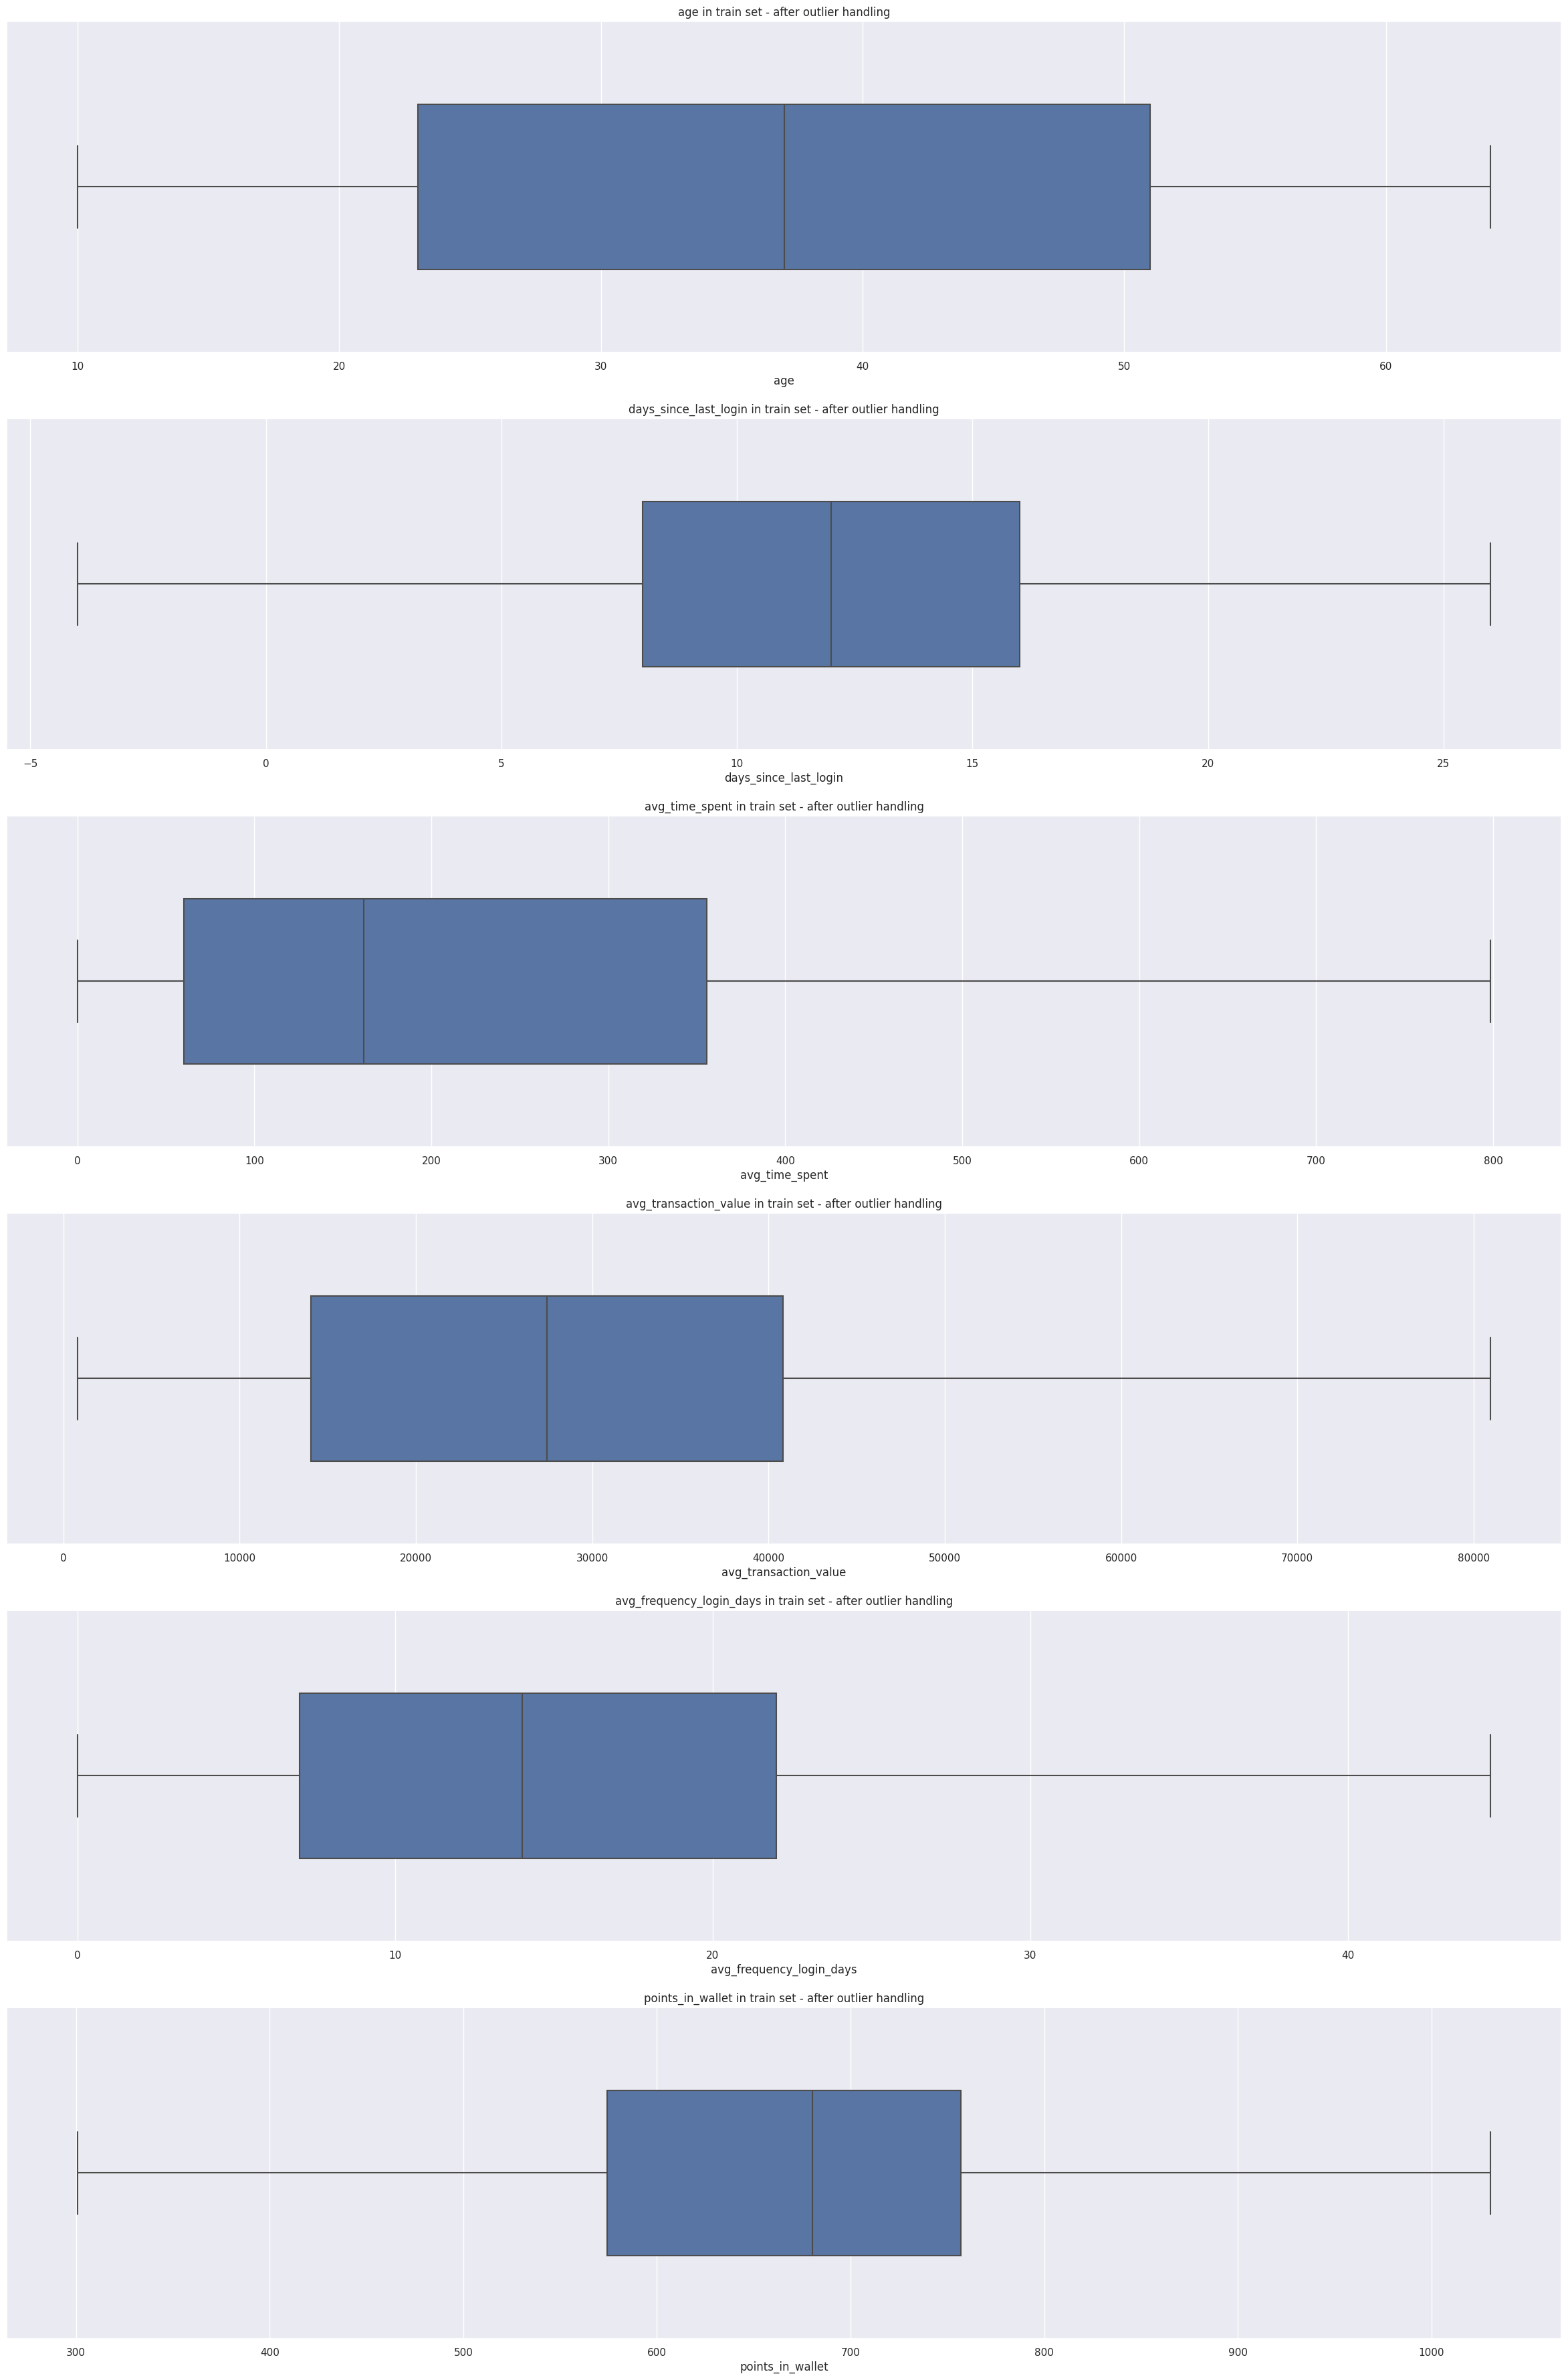

In [143]:
#Boxplot visualization
num = X_train_num
n = len(num.columns)
sns.set(font_scale=1)
fig, ax = plt.subplots(n, 1, figsize=(30, 45))
for i in range(n):
    col = num.columns[i]
    sns.boxplot(ax=ax[i], data=X_train, x=X_train[col], width=0.50)
    ax[i].set_title(f'{col} in train set - after outlier handling')

plt.show()


No more outliers detected on all variables.

## 5.5 Feature Selection

In [144]:
from sklearn.feature_selection import SelectKBest, f_classif

In [145]:
# Using LabelEncoder to convert categorical into numerical data
X_train_features = X_train.copy()
m_LabelEncoder = LabelEncoder()

for col in X_train_features[cat_columns]:
    X_train_features[col]=m_LabelEncoder.fit_transform(X_train_features[col])

In [146]:
# Feature Selection (select 10 best features)
selector = SelectKBest(score_func=f_classif, k=10)
selector = selector.fit(X_train_features, y_train)

df_scores = pd.DataFrame({'Feature': X_train_features.columns, 
                          'Score': selector.scores_,
                          'p-value': (selector.pvalues_).round(4)})

df_scores = df_scores.sort_values(by=['Score'], ascending=False)
df_scores

,Feature,Score,p-value
4,membership_category,7156.410868,0.0000
15,points_in_wallet,2049.144868,0.0000
13,avg_transaction_value,1318.868426,0.0000
20,feedback,1286.410270,0.0000
14,avg_frequency_login_days,366.436936,0.0000
6,joined_through_referral,33.190881,0.0000
7,preferred_offer_types,15.571253,0.0001
17,offer_application_preference,14.417486,0.0001
3,region_category,10.343121,0.0013
12,avg_time_spent,9.559989,0.0020


In [147]:
# Ambil hanya variabel prediktor yang dipilih
X = X_train_features[['membership_category', 'points_in_wallet', 'avg_transaction_value','feedback', 'avg_frequency_login_days','joined_through_referral', 'preferred_offer_types', 'offer_application_preference', 'region_category','avg_time_spent', 'medium_of_operation', 'days_since_last_login']]

# Hitung VIF untuk setiap variabel prediktor
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)

                        Variable       VIF
0            membership_category  2.722218
1               points_in_wallet  9.166299
2          avg_transaction_value  3.451048
3                       feedback  2.529709
4       avg_frequency_login_days  3.112093
5        joined_through_referral  2.155972
6          preferred_offer_types  2.067843
7   offer_application_preference  2.205199
8                region_category  2.057101
9                 avg_time_spent  2.130881
10           medium_of_operation  3.860910
11         days_since_last_login  3.754302


From the value of p-value we knows that there are 12 feature that have p-value <0.05. From all of that feature there are no feature that have VIF score above 10. And according to the correlation value there are 5 variables that have strong correlation to the target variable. We're gonna use that 5 variable first to make the models so the models not gonna be too complex. The features that gonna be chosen is 'membership_category', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet', and 'feedback'.

In [148]:
# Necessary Features

Drop_Columns = ['user_id', 'age', 'gender', 'region_category', 'joining_date', 'joined_through_referral', 'preferred_offer_types', 'medium_of_operation', 'internet_option', 'last_visit_time', 'days_since_last_login', 'avg_time_spent', 'used_special_discount', 'offer_application_preference', 'past_complaint', 'complaint_status']
Features = ['membership_category', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet','feedback']
X_train_final = X_train[Features]
X_val_final = X_val[Features]
X_test_final = X_test[Features]

X_train_final

,membership_category,avg_transaction_value,avg_frequency_login_days,points_in_wallet,feedback
23522,Basic Membership,14222.33,20.0,676.330000,Too many ads
8838,Basic Membership,49430.69,28.0,646.720000,Too many ads
29694,Gold Membership,16656.89,20.0,456.930046,No reason specified
34506,Basic Membership,16791.67,11.0,641.510000,No reason specified
25788,Silver Membership,8806.96,21.0,728.040000,Poor Customer Service
...,...,...,...,...,...
34085,Premium Membership,18154.67,15.0,424.860772,User Friendly Website
22637,Premium Membership,46120.48,20.0,300.715000,Too many ads
10843,Gold Membership,29235.17,19.0,300.715000,Poor Product Quality
33123,Platinum Membership,13518.84,9.0,763.100000,Poor Product Quality


## 5.6 Encoding

### 5.6.1 Categorical Column Cardinality

In [149]:
print("Unique values in 'membership_category':")
print(X_train_final['membership_category'].unique())

print("\nUnique values in 'feedback':")
print(X_train_final['feedback'].unique())

Unique values in 'membership_category':
['Basic Membership' 'Gold Membership' 'Silver Membership' 'No Membership'
 'Premium Membership' 'Platinum Membership']

Unique values in 'feedback':
['Too many ads' 'No reason specified' 'Poor Customer Service'
 'Poor Website' 'Poor Product Quality' 'User Friendly Website'
 'Quality Customer Care' 'Products always in Stock' 'Reasonable Price']


There are 6 unique value on variable 'membership_category' and 9 on variable 'feedback'. We're gonna reduce the cardinality of it to max 5 unique values.
For 'feedback' we're gonna classified it into three values, which are 'No reason specified', 'Negative Feedback' and 'Positive Feedback'.

In [150]:
X_train_final1 = X_train_final

In [151]:
# dictionary
feedback_class = {
    'No reason specified': 'No reason specified',
    'Too many ads': 'Negative Feedback',
    'Poor Customer Service': 'Negative Feedback',
    'Poor Website': 'Negative Feedback',
    'Poor Product Quality': 'Negative Feedback',
    'User Friendly Website': 'Positive Feedback',
    'Quality Customer Care': 'Positive Feedback',
    'Products always in Stock': 'Positive Feedback',
    'Reasonable Price': 'Positive Feedback'
}

# Replace values based on dictionary
X_train_final['feedback'] = X_train_final['feedback'].replace(feedback_class)
X_val_final['feedback'] = X_val['feedback'].replace(feedback_class)
X_test_final['feedback'] = X_test['feedback'].replace(feedback_class)

X_train_final

,membership_category,avg_transaction_value,avg_frequency_login_days,points_in_wallet,feedback
23522,Basic Membership,14222.33,20.0,676.330000,Negative Feedback
8838,Basic Membership,49430.69,28.0,646.720000,Negative Feedback
29694,Gold Membership,16656.89,20.0,456.930046,No reason specified
34506,Basic Membership,16791.67,11.0,641.510000,No reason specified
25788,Silver Membership,8806.96,21.0,728.040000,Negative Feedback
...,...,...,...,...,...
34085,Premium Membership,18154.67,15.0,424.860772,Positive Feedback
22637,Premium Membership,46120.48,20.0,300.715000,Negative Feedback
10843,Gold Membership,29235.17,19.0,300.715000,Negative Feedback
33123,Platinum Membership,13518.84,9.0,763.100000,Negative Feedback


## 5.7 Pipeline

### 5.7.1 Scikit Learn Pipeline

Scikit Learn Pipeline used to scaling and encoding purpose for the feature variables. For the scaling method that used in this are StandardScaler for normally distributed variabeles and MinMaxScaler for the variables that skewed. For the encoder that used in this is OneHotEncoder.

In [152]:
# Get Numerical Columns and Categorical Columns

num_columns = X_train_final.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train_final.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns :  ['avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet']
Categorical Columns :  ['membership_category', 'feedback']


In [153]:
# Normal and Skewed Numerical Columns
num_columns_s = ['avg_transaction_value','points_in_wallet']
num_columns_n = ['avg_frequency_login_days']

In [154]:
# Create A Pipeline

num_pipeline_n = make_pipeline(StandardScaler())
num_pipeline_s = make_pipeline(MinMaxScaler())
cat_pipeline = make_pipeline(OneHotEncoder(sparse=False))

final_pipeline = ColumnTransformer([
    ('pipe_num_n', num_pipeline_n, num_columns_n),
    ('pipe_num_s', num_pipeline_s, num_columns_s),
    ('pipe_cat', cat_pipeline, cat_columns)
])

In [155]:
# Fit and Transform

X_train_final = final_pipeline.fit_transform(X_train_final)
X_val_final = final_pipeline.transform(X_val_final)
X_test_final = final_pipeline.transform(X_test_final)

In [156]:
X_train_final.shape

(26739, 12)

In [157]:
X_train_final

array([[ 0.57239948,  0.16742788,  0.5146821 , ...,  1.        ,
         0.        ,  0.        ],
       [ 1.42512291,  0.60662606,  0.47410935, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.57239948,  0.19779721,  0.21405186, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.46580905,  0.35470193,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [-0.60009524,  0.15865236,  0.63357769, ...,  1.        ,
         0.        ,  0.        ],
       [-0.70668567,  0.0157253 ,  0.67578104, ...,  1.        ,
         0.        ,  0.        ]])

### 5.7.2 Tensorflow Pipeline

In tensorflow pipeline we gonna bundled the sclaed and encoded pipeline that already made above so it can be processed in the model later.
The condition for the pipeline are:
 - Number of batch 923
 - Number of shuffle is equal to the number of column in train set
 - repeat for 2 times

The numbers on condition is picked randomly for trial and error

In [158]:
# Bundle preprocessing for numerical and categorical data to tensorflow before being input to the model
train_pipe = tf.data.Dataset.from_tensor_slices((X_train_final,y_train)).batch(923).shuffle(len(X_train_final)).repeat(2).prefetch(tf.data.AUTOTUNE)
test_pipe = tf.data.Dataset.from_tensor_slices((X_test_final,y_test)).batch(923)
val_pipe = tf.data.Dataset.from_tensor_slices((X_val_final,y_val)).batch(923)

# vi. Model Definition

## 6.1 Sequential

Hyperparameters that are used on this base model are:
 - Number of neuron that used on the models are equal to the number of column in train set.
 - Numbers of hidden layer that gonna be used on this base model are 4 hidden layer with the details are on hidden layer 1 it got 96 neuron, on hidden layer 2 it got 48 neuron,on hidden layer 3 it got 24 neuron,  on hidden layer 4 it got 12 neuron.
 - Using ReLU as activation function for every hidden layer
 - Using HeNormal for hidden layer 1 and default for the others.
 - Using l1 for hidden layer 1 and default for the others.
 - Using sigmoid as activation function
 - For compiling loss are binary_crossentropy, optimizer used are SGD and focused on recall as metric.

In [159]:
# Sequential
# Clear Session

seed = 50
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

# Create Sequential API
model_seq = tf.keras.models.Sequential()

# Hidden Layer 1
model_seq.add(tf.keras.layers.Dense(96, activation='relu',input_shape=(X_train_final.shape[1],),kernel_initializer='HeNormal',kernel_regularizer='l1')) 

# Hidden Layer 2
model_seq.add(tf.keras.layers.Dense(48, activation='relu'))

# Hidden Layer 3
model_seq.add(tf.keras.layers.Dense(24, activation='relu'))

# Hidden Layer 4
model_seq.add(tf.keras.layers.Dense(12, activation='relu'))

# Output Layer
model_seq.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# compile
model_seq.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.SGD(),metrics=['Recall'])
model_seq.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 96)                1248      
                                                                 
 dense_1 (Dense)             (None, 48)                4656      
                                                                 
 dense_2 (Dense)             (None, 24)                1176      
                                                                 
 dense_3 (Dense)             (None, 12)                300       
                                                                 
 dense_4 (Dense)             (None, 1)                 13        
                                                                 
Total params: 7,393
Trainable params: 7,393
Non-trainable params: 0
_________________________________________________________________


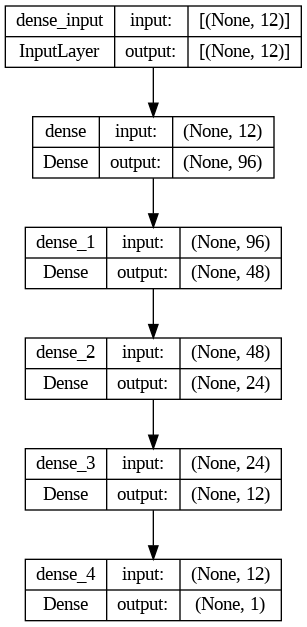

In [160]:
# Plot Layers for Model 
tf.keras.utils.plot_model(model_seq, show_shapes=True)

## 6.2 Model Improvement Sequential

The hyperparameters of the model is modified in this to get better result. Hyperparameters that being modified is :
- Reducing the hidden layer from 4 (on base model) to 2 hidden layer on improved model.
- Using dropout to all hidden layers
- Using HeNormal onto hidden layer 2 not only on hidden layer 1
- Using Adam as optimizer

In [161]:
# Sequential - Model Improvement
# Clear Session

seed = 50
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

# Create Sequential API
model_seq2 = tf.keras.models.Sequential()

# Hidden Layer 1
model_seq2.add(tf.keras.layers.Dense(96, activation='relu',input_shape=(X_train_final.shape[1],),kernel_initializer='HeNormal',kernel_regularizer='l1')) 
model_seq2.add(tf.keras.layers.Dropout(rate=0.2)) # adding dropout for every hidden layers

# Hidden Layer 2
model_seq2.add(tf.keras.layers.Dense(48, activation='relu',kernel_initializer='HeNormal')) # adding initializer for every layers
model_seq2.add(tf.keras.layers.Dropout(rate=0.2)) # adding dropout for every hidden layers

# Reducing number of hidden layers
# Output Layer
model_seq2.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model_seq2.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(),metrics=['Recall']) # Optimizer=Adam
model_seq2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 96)                1248      
                                                                 
 dropout (Dropout)           (None, 96)                0         
                                                                 
 dense_1 (Dense)             (None, 48)                4656      
                                                                 
 dropout_1 (Dropout)         (None, 48)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 49        
                                                                 
Total params: 5,953
Trainable params: 5,953
Non-trainable params: 0
_________________________________________________________________


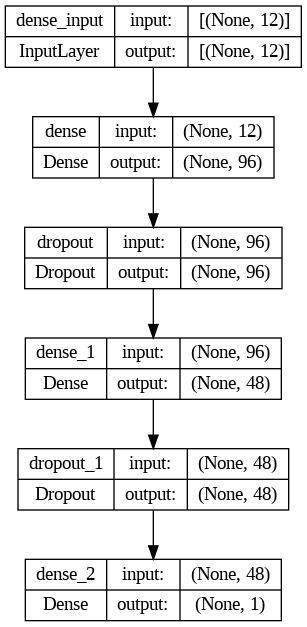

In [162]:
# Plot Layers for Model 
tf.keras.utils.plot_model(model_seq2, show_shapes=True)

## 6.3 Functional

Hyperparameter that used on this base model is gonna be the same as the sequential model before, the addition on this model is concatenate layer.

In [163]:
# Functional
# Clear Session

seed = 50
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

# input_layer
input_layer = Input(shape=(X_train_final.shape[1],))

# hidden_layer1
hidden_layer1 = Dense(96, activation='relu')(input_layer)

# hidden_layer2
hidden_layer2 = Dense(48, activation='relu')(hidden_layer1)

# hidden_layer3
hidden_layer3 = Dense(24, activation='relu')(hidden_layer2)

# concat_layer
concat_layer = concatenate([input_layer, hidden_layer3])

# Output Layer
output_layer = Dense(1, activation='sigmoid')(concat_layer)

model_functional = Model(inputs=input_layer, outputs=output_layer)

# Compile
model_functional.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.SGD(),metrics=['Recall'])
model_functional.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 12)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 96)           1248        ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 48)           4656        ['dense[0][0]']                  
                                                                                                  
 dense_2 (Dense)                (None, 24)           1176        ['dense_1[0][0]']                
                                                                                              

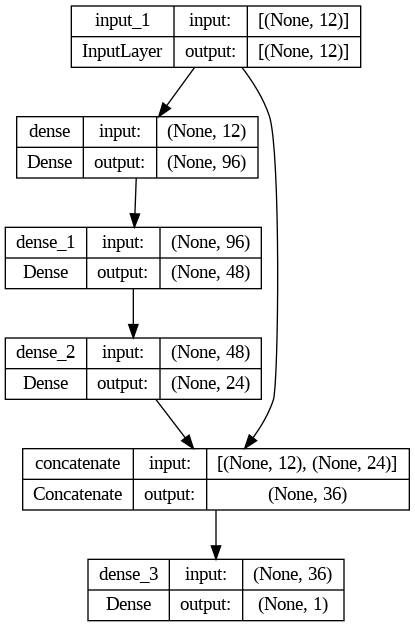

In [164]:
# Plot Layers for Model 
tf.keras.utils.plot_model(model_functional, show_shapes=True)

## 6.4 Functional - Model Improvement

Several hyperparameters were adjusted to improve this model, the hyperparameters are:
- Use 4 hidden layers
- Using Dropout on every hidden layers
- Using regularization as kernel on layer 1 only
- using HeNormal on every hidden layers.
- Change optimizer into Adam

In [165]:
# Functional - Model Improvement
# Clear Session

seed = 50
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

# input layer
input_layer = Input(shape=(X_train_final.shape[1],))
dropout1 = Dropout(0.2)(input_layer)

# Hidden Layer 1
hidden_layer1 = Dense(96, activation='relu',kernel_initializer='HeNormal',kernel_regularizer='l2')(dropout1)
dropout2 = Dropout(0.2)(hidden_layer1)

# Hidden Layer 2
hidden_layer2 = Dense(48, activation='relu',kernel_initializer='HeNormal')(dropout2)
dropout3 = Dropout(0.2)(hidden_layer2)

# Hidden Layer 3
hidden_layer3 = Dense(24, activation='relu',kernel_initializer='HeNormal')(dropout3)
dropout4 = Dropout(0.2)(hidden_layer3)

# Hidden Layer 4
hidden_layer4 = Dense(12, activation='relu',kernel_initializer='HeNormal')(dropout4)
dropout5 = Dropout(0.2)(hidden_layer4)

# Concat Layer
concat_layer = concatenate([input_layer, dropout5])

# Output Layer
output_layer = Dense(1, activation='sigmoid')(concat_layer)

model_functional2 = Model(inputs=input_layer, outputs=output_layer)
# Compile
model_functional2.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(),metrics=['Recall'])
model_functional2.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 12)]         0           []                               
                                                                                                  
 dropout (Dropout)              (None, 12)           0           ['input_1[0][0]']                
                                                                                                  
 dense (Dense)                  (None, 96)           1248        ['dropout[0][0]']                
                                                                                                  
 dropout_1 (Dropout)            (None, 96)           0           ['dense[0][0]']                  
                                                                                              

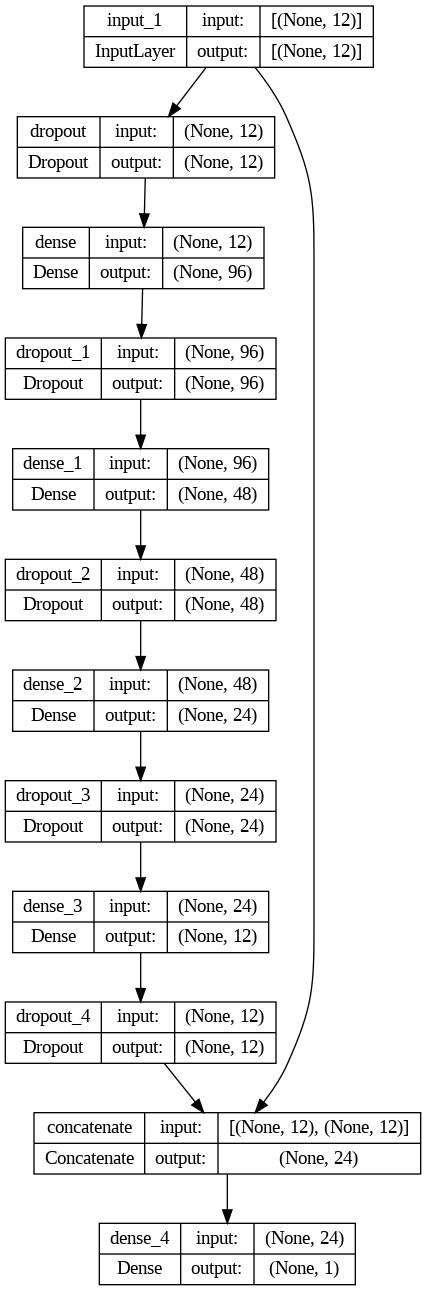

In [166]:
# Plot Layers for Model 
tf.keras.utils.plot_model(model_functional2, show_shapes=True)

# vii. Model Training

In [167]:
# Callback = EarlyStopping

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3,restore_best_weights=True)

The amount of epoch used on this modelling are 300 with callback function EarlyStopping so the model gonna stop training automatically when the monitored metric has stopped improving.

## 7.1 Sequential

In [168]:
# Train the Model - Sequential

%%time
history_seq=model_seq.fit(train_pipe, validation_data=(val_pipe), epochs = 300, callbacks=[callback])

Epoch 1/300
58/58 [==============================] - 4s 17ms/step - loss: 4.4944 - recall: 0.2008 - val_loss: 4.4357 - val_recall: 0.5708
Epoch 2/300
58/58 [==============================] - 1s 10ms/step - loss: 4.3888 - recall: 0.6990 - val_loss: 4.3390 - val_recall: 0.7613
Epoch 3/300
58/58 [==============================] - 1s 15ms/step - loss: 4.2908 - recall: 0.7632 - val_loss: 4.2373 - val_recall: 0.7852
Epoch 4/300
58/58 [==============================] - 1s 11ms/step - loss: 4.1840 - recall: 0.7866 - val_loss: 4.1233 - val_recall: 0.7930
Epoch 5/300
58/58 [==============================] - 1s 10ms/step - loss: 4.0655 - recall: 0.8102 - val_loss: 3.9986 - val_recall: 0.8330
Epoch 6/300
58/58 [==============================] - 1s 10ms/step - loss: 3.9414 - recall: 0.8450 - val_loss: 3.8749 - val_recall: 0.8597
Epoch 7/300
58/58 [==============================] - 1s 7ms/step - loss: 3.8234 - recall: 0.8578 - val_loss: 3.7601 - val_recall: 0.8702
Epoch 8/300
58/58 [================

## 7.2 Sequential - Model Improvement

In [169]:
# Train the Model - Sequential - Model Improvement

%%time
history_seq2=model_seq2.fit(train_pipe, validation_data=(val_pipe), epochs = 300, callbacks=callback)

Epoch 1/300
58/58 [==============================] - 2s 7ms/step - loss: 4.0148 - recall: 0.8360 - val_loss: 3.5099 - val_recall: 0.8361
Epoch 2/300
58/58 [==============================] - 0s 4ms/step - loss: 3.2562 - recall: 0.8638 - val_loss: 2.9132 - val_recall: 0.8369
Epoch 3/300
58/58 [==============================] - 0s 4ms/step - loss: 2.7033 - recall: 0.8707 - val_loss: 2.4112 - val_recall: 0.8918
Epoch 4/300
58/58 [==============================] - 0s 4ms/step - loss: 2.2322 - recall: 0.8711 - val_loss: 1.9779 - val_recall: 0.8769
Epoch 5/300
58/58 [==============================] - 0s 4ms/step - loss: 1.8226 - recall: 0.8716 - val_loss: 1.6063 - val_recall: 0.9067
Epoch 6/300
58/58 [==============================] - 0s 4ms/step - loss: 1.4822 - recall: 0.8699 - val_loss: 1.2970 - val_recall: 0.8338
Epoch 7/300
58/58 [==============================] - 0s 4ms/step - loss: 1.1983 - recall: 0.8688 - val_loss: 1.0390 - val_recall: 0.8408
Epoch 8/300
58/58 [======================

## 7.3 Functional

In [170]:
# Train the Model - Functional

%%time
history_functional=model_functional.fit(train_pipe, validation_data=(val_pipe), epochs = 300, callbacks=callback)

Epoch 1/300
58/58 [==============================] - 1s 7ms/step - loss: 0.6187 - recall: 0.7107 - val_loss: 0.6070 - val_recall: 0.7534
Epoch 2/300
58/58 [==============================] - 0s 4ms/step - loss: 0.5907 - recall: 0.7907 - val_loss: 0.5793 - val_recall: 0.8310
Epoch 3/300
58/58 [==============================] - 0s 4ms/step - loss: 0.5648 - recall: 0.8505 - val_loss: 0.5530 - val_recall: 0.8906
Epoch 4/300
58/58 [==============================] - 0s 5ms/step - loss: 0.5398 - recall: 0.8983 - val_loss: 0.5273 - val_recall: 0.9051
Epoch 5/300
58/58 [==============================] - 0s 4ms/step - loss: 0.5151 - recall: 0.9142 - val_loss: 0.5018 - val_recall: 0.9247
Epoch 6/300
58/58 [==============================] - 0s 4ms/step - loss: 0.4905 - recall: 0.9293 - val_loss: 0.4763 - val_recall: 0.9436
Epoch 7/300
58/58 [==============================] - 0s 4ms/step - loss: 0.4658 - recall: 0.9447 - val_loss: 0.4507 - val_recall: 0.9498
Epoch 8/300
58/58 [======================

## 7.4 Functional - Model Improvement

In [171]:
# Train the Model - Functional - Model Improvement

%%time
history_functional2=model_functional2.fit(train_pipe, validation_data=(val_pipe), epochs = 300, callbacks=callback)

Epoch 1/300
58/58 [==============================] - 3s 8ms/step - loss: 2.2362 - recall: 0.7613 - val_loss: 1.8179 - val_recall: 0.8412
Epoch 2/300
58/58 [==============================] - 0s 5ms/step - loss: 1.7455 - recall: 0.8206 - val_loss: 1.4611 - val_recall: 0.8981
Epoch 3/300
58/58 [==============================] - 0s 7ms/step - loss: 1.4340 - recall: 0.8418 - val_loss: 1.2055 - val_recall: 0.9424
Epoch 4/300
58/58 [==============================] - 1s 8ms/step - loss: 1.1984 - recall: 0.8699 - val_loss: 1.0018 - val_recall: 0.9447
Epoch 5/300
58/58 [==============================] - 1s 7ms/step - loss: 1.0080 - recall: 0.8859 - val_loss: 0.8410 - val_recall: 0.9388
Epoch 6/300
58/58 [==============================] - 1s 7ms/step - loss: 0.8604 - recall: 0.8785 - val_loss: 0.7140 - val_recall: 0.9400
Epoch 7/300
58/58 [==============================] - 1s 7ms/step - loss: 0.7402 - recall: 0.8871 - val_loss: 0.6122 - val_recall: 0.9600
Epoch 8/300
58/58 [======================

# viii. Model Evaluation

## 8.1 Sequential

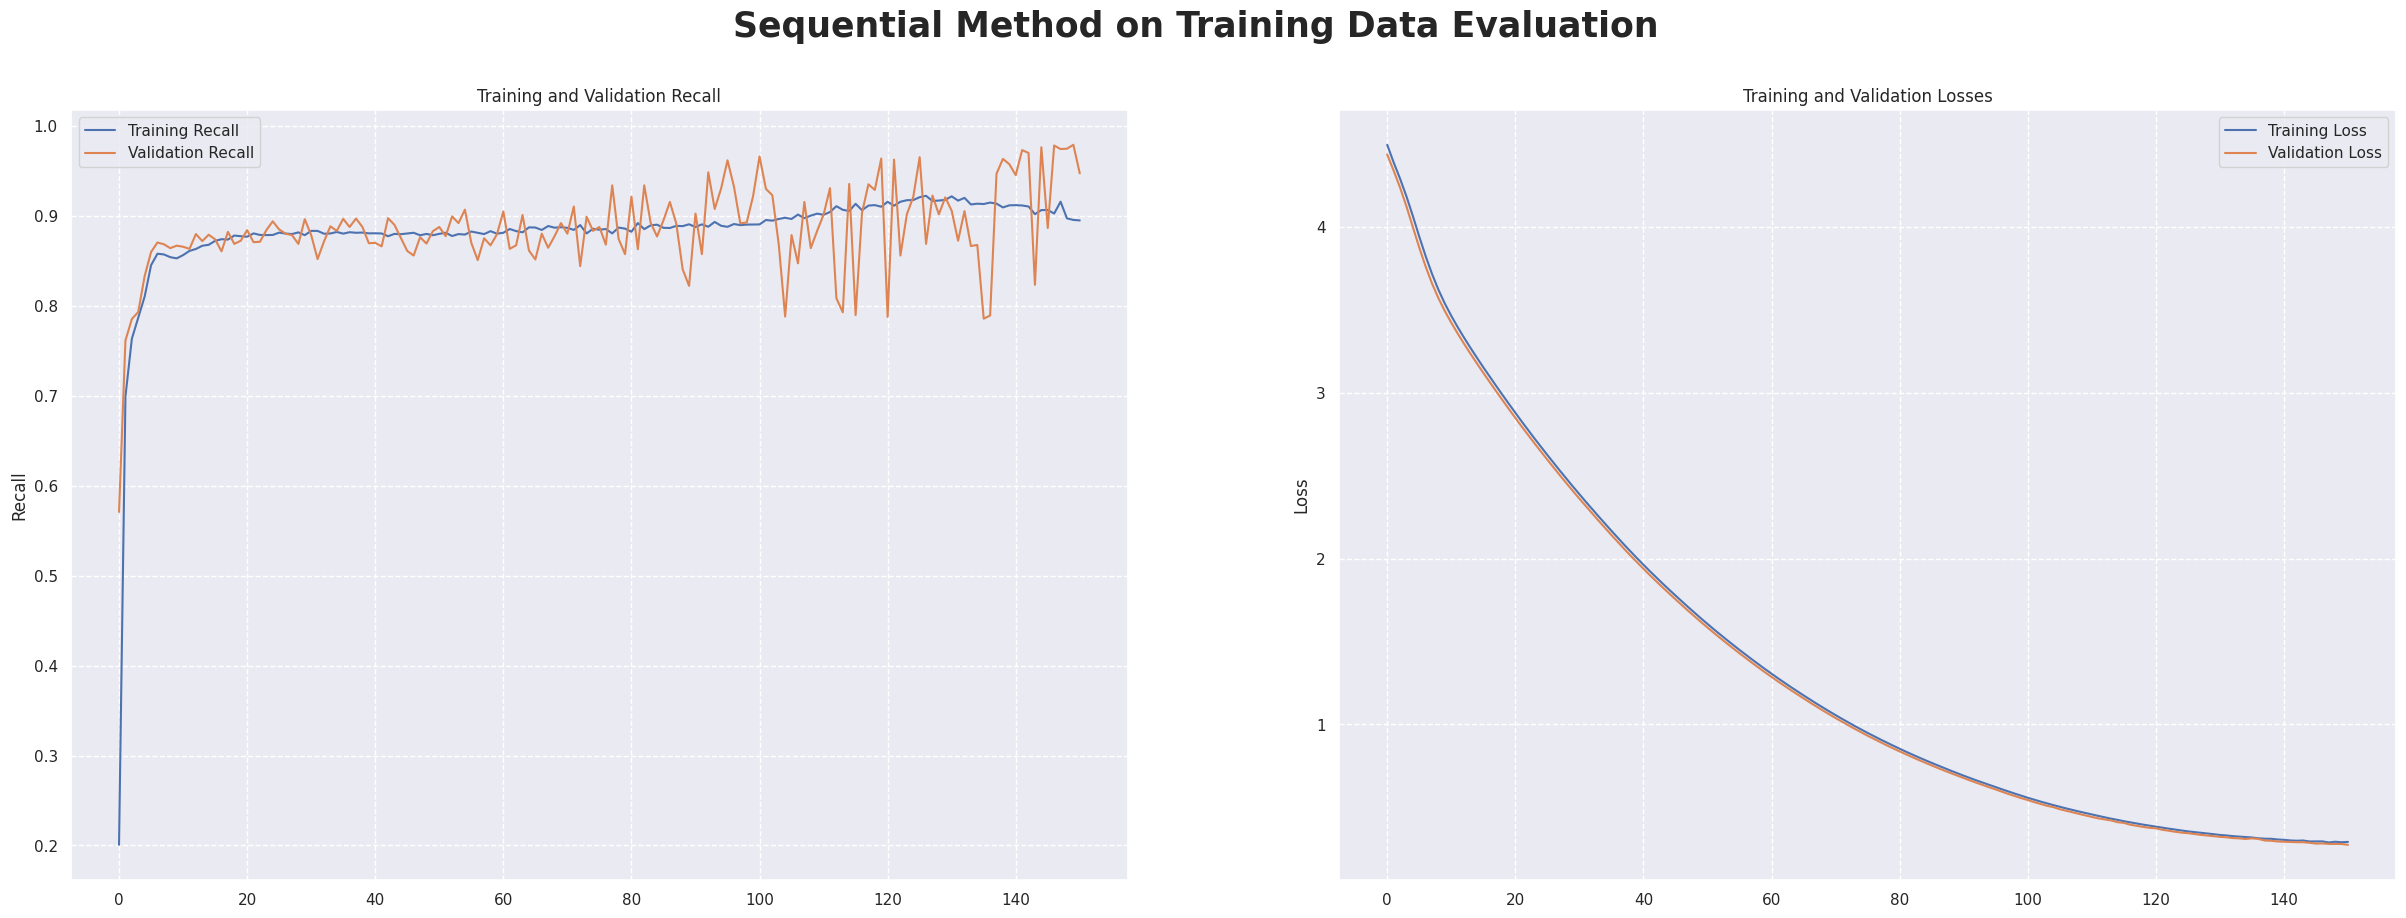

In [172]:
fig, ax = plt.subplots(1,2, figsize=(30,10))
fig.suptitle('Sequential Method on Training Data Evaluation', fontsize=25, weight='bold')

plt.subplot(1,2,1)
plt.title("Training and Validation Recall", fontsize=12)
plt.plot(history_seq.history['recall'],label="Training Recall")
plt.plot(history_seq.history['val_recall'], label="Validation Recall")
plt.ylabel("Recall", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title("Training and Validation Losses", fontsize=12)
plt.plot(history_seq.history['loss'], label="Training Loss")
plt.plot(history_seq.history['val_loss'], label="Validation Loss")
plt.ylabel("Loss", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.style.use('default')
plt.show()

174/174 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.96      0.76      0.85      2604
           1       0.82      0.97      0.89      2948

    accuracy                           0.87      5552
   macro avg       0.89      0.87      0.87      5552
weighted avg       0.89      0.87      0.87      5552



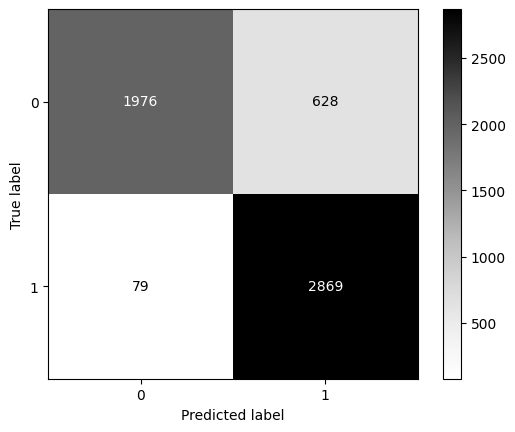

In [173]:
# Model Evaluation of test-set

y_pred_seq = model_seq.predict(X_test_final)
y_pred_seq = np.where(y_pred_seq >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_seq))

# confusion matrix

cm = confusion_matrix(y_test, y_pred_seq)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,)
disp.plot(cmap='Greys')
plt.show()

From the evaluation above we know that with the accuracy almost 90% its about 89% and the other score is almost 90% too we can know that the models model is accurate enough to predict whether a customer is at risk of churning. With this base model we're gonna evaluate the model that has been improved.

## 8.2 Sequential - Model Improvement

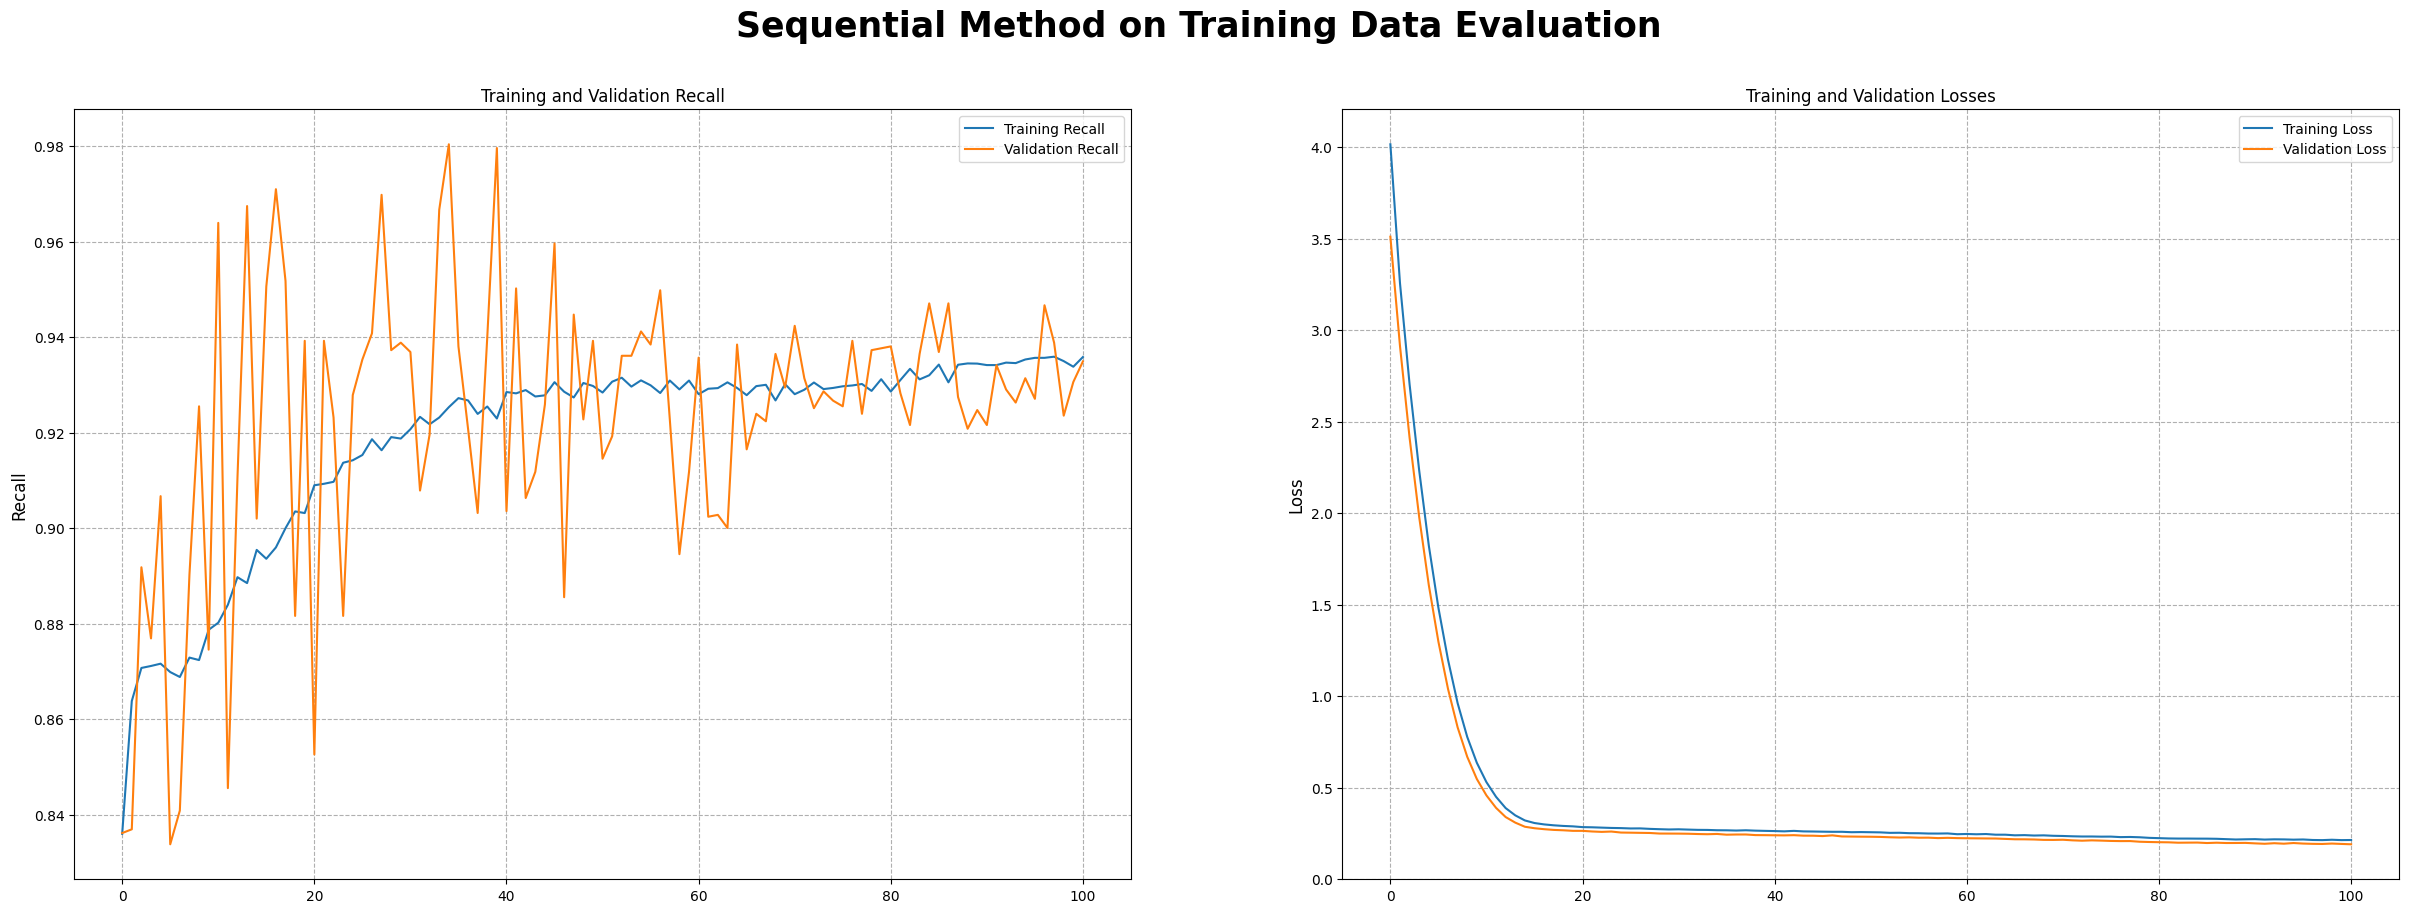

In [174]:
fig, ax = plt.subplots(1,2, figsize=(30,10))
fig.suptitle('Sequential Method on Training Data Evaluation', fontsize=25, weight='bold')

plt.subplot(1,2,1)
plt.title("Training and Validation Recall", fontsize=12)
plt.plot(history_seq2.history['recall'],label="Training Recall")
plt.plot(history_seq2.history['val_recall'], label="Validation Recall")
plt.ylabel("Recall", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title("Training and Validation Losses", fontsize=12)
plt.plot(history_seq2.history['loss'], label="Training Loss")
plt.plot(history_seq2.history['val_loss'], label="Validation Loss")
plt.ylabel("Loss", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.style.use('default')
plt.show()

174/174 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      2604
           1       0.92      0.94      0.93      2948

    accuracy                           0.93      5552
   macro avg       0.93      0.92      0.92      5552
weighted avg       0.93      0.93      0.93      5552



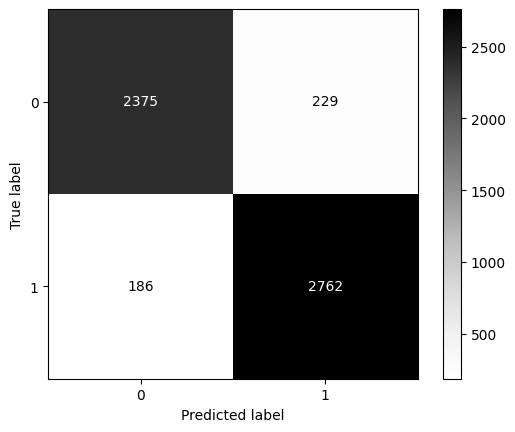

In [175]:
# Model Evaluation of test-set

y_pred_seq2 = model_seq2.predict(X_test_final)
y_pred_seq2 = np.where(y_pred_seq2 >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_seq2))

# confusion matrix
cm = confusion_matrix(y_test, y_pred_seq2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,)
disp.plot(cmap='Greys')
plt.show()

From the evaluation above we know that with the accuracy and the other score above 90% this model got improved compared to base model and this model is good enough to be used on real life case to predict whether a customer is at risk of churning. This model got better precision and recall score compared to base model, it means that this model has lower number of false negative and false positive compared to base model.

## 8.3 Functional

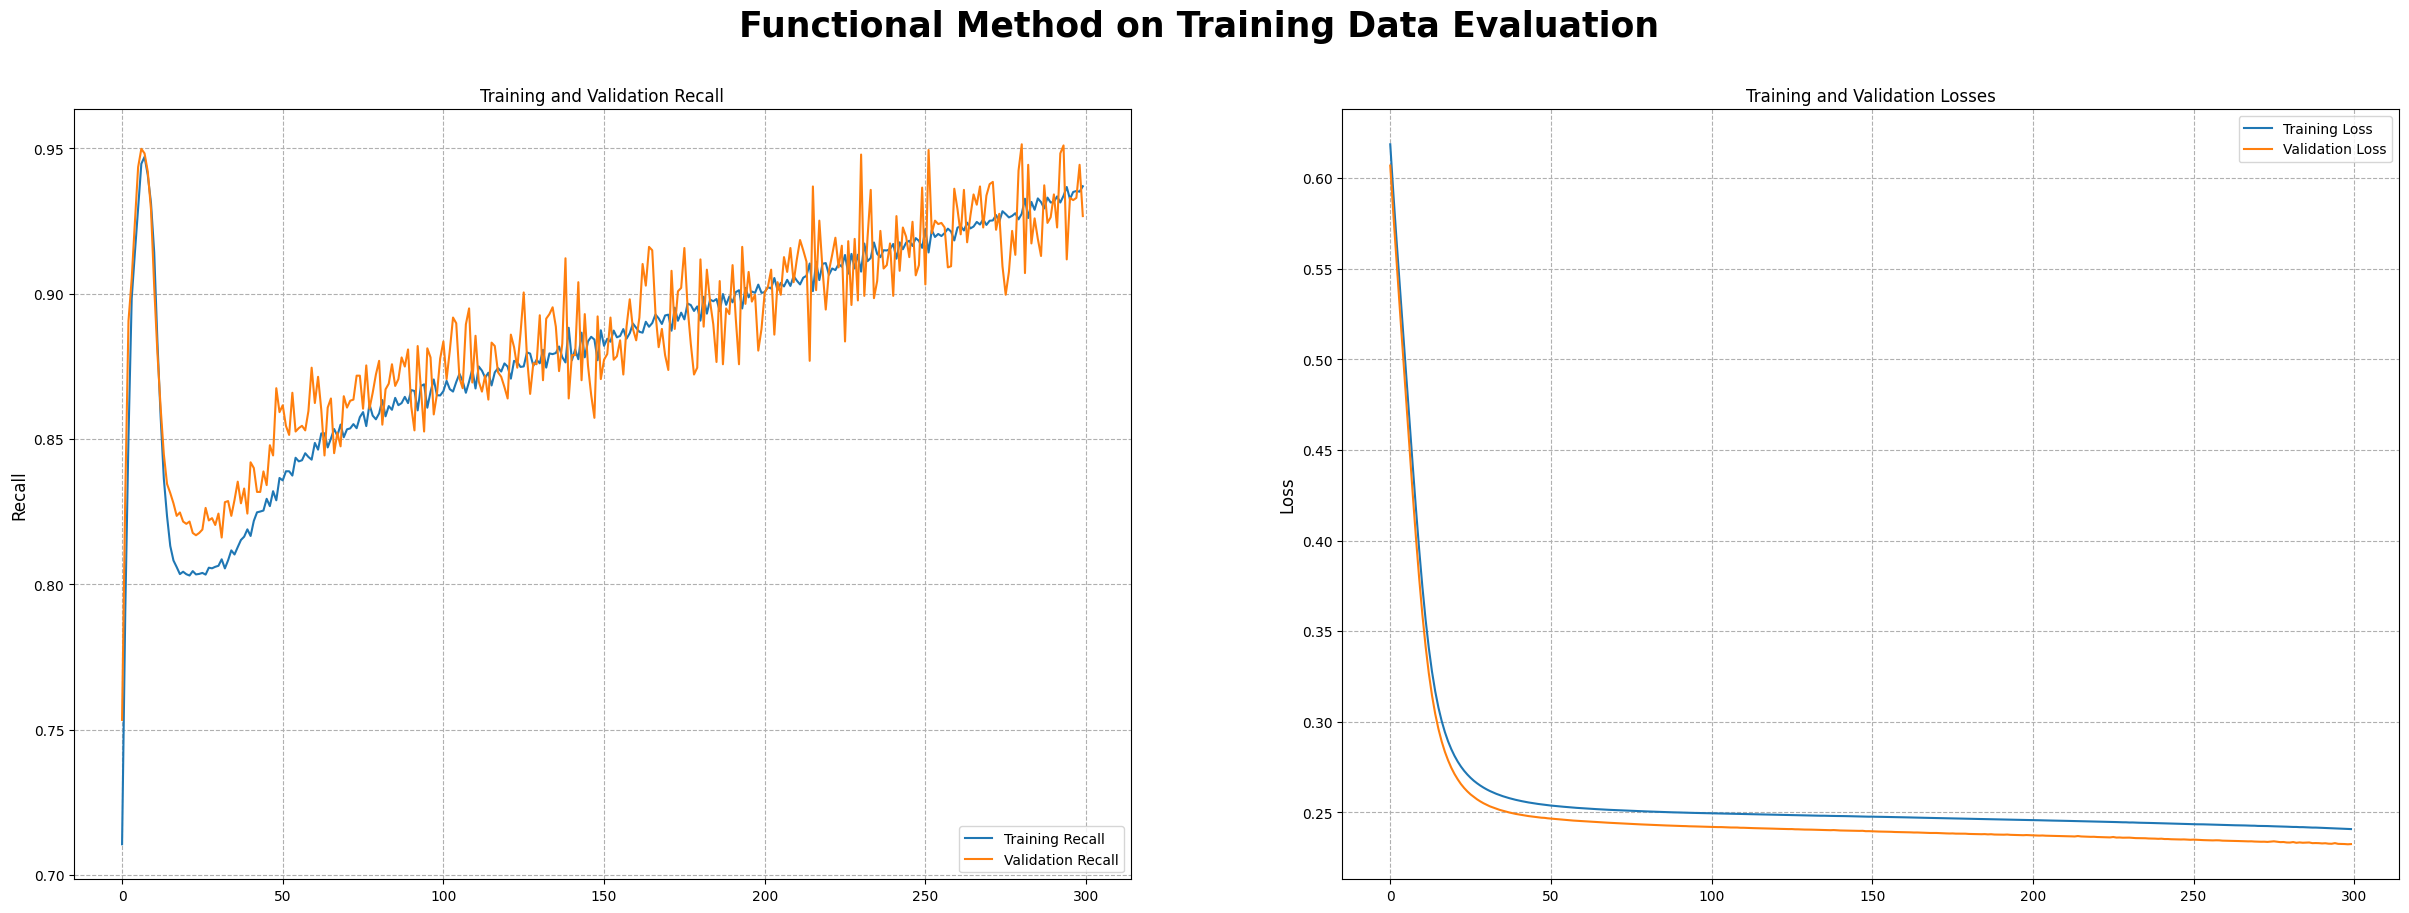

In [176]:
fig, ax = plt.subplots(1,2, figsize=(30,10))
fig.suptitle('Functional Method on Training Data Evaluation', fontsize=25, weight='bold')

plt.subplot(1,2,1)
plt.title("Training and Validation Recall", fontsize=12)
plt.plot(history_functional.history['recall'],label="Training Recall")
plt.plot(history_functional.history['val_recall'], label="Validation Recall")
plt.ylabel("Recall", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title("Training and Validation Losses", fontsize=12)
plt.plot(history_functional.history['loss'], label="Training Loss")
plt.plot(history_functional.history['val_loss'], label="Validation Loss")
plt.ylabel("Loss", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.style.use('default')
plt.show()

174/174 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.91      0.90      0.90      2604
           1       0.91      0.92      0.92      2948

    accuracy                           0.91      5552
   macro avg       0.91      0.91      0.91      5552
weighted avg       0.91      0.91      0.91      5552



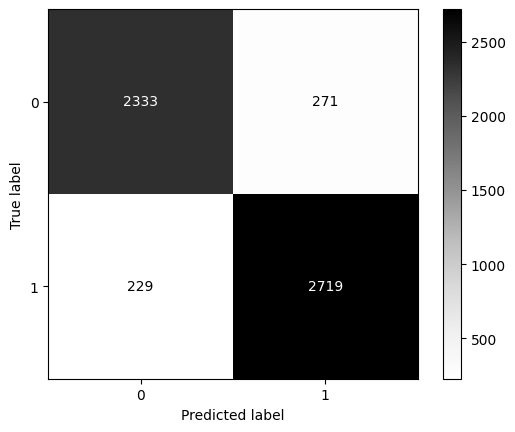

In [177]:
# Model Evaluation of test-set

y_pred_functional = model_functional.predict(X_test_final)
y_pred_functional = np.where(y_pred_functional >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_functional))

# confusion matrix
cm = confusion_matrix(y_test, y_pred_functional)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,)
disp.plot(cmap='Greys')
plt.show()

From the evaluation above we know that with the accuracy and other metrics already above 90%, according to that evaluation score this model can be used too on real life case  to predict whether a customer is at risk of churning. With this base model we're gonna evaluate the model that has been improved.

## 8.4 Functional - Model Improvement

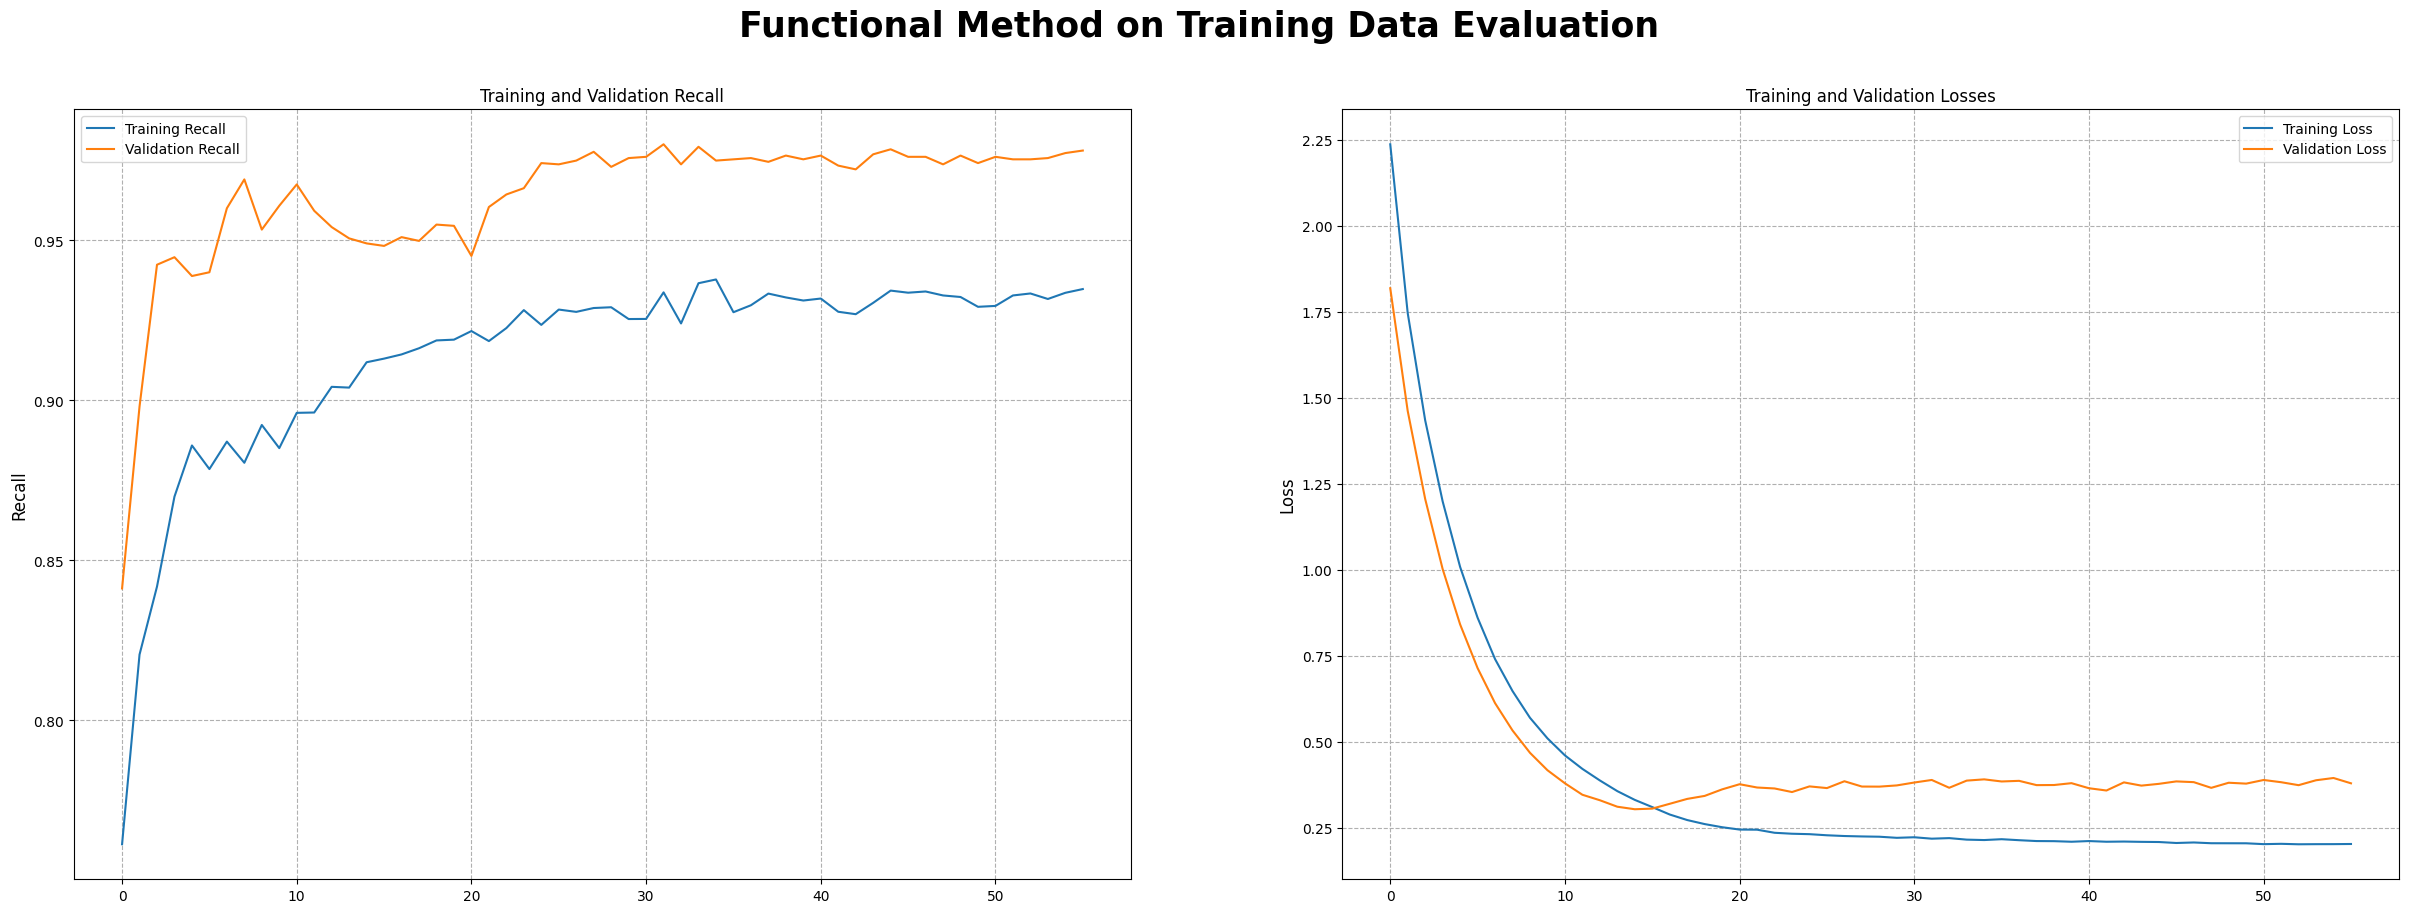

In [178]:
fig, ax = plt.subplots(1,2, figsize=(30,10))
fig.suptitle('Functional Method on Training Data Evaluation', fontsize=25, weight='bold')

plt.subplot(1,2,1)
plt.title("Training and Validation Recall", fontsize=12)
plt.plot(history_functional2.history['recall'],label="Training Recall")
plt.plot(history_functional2.history['val_recall'], label="Validation Recall")
plt.ylabel("Recall", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title("Training and Validation Losses", fontsize=12)
plt.plot(history_functional2.history['loss'], label="Training Loss")
plt.plot(history_functional2.history['val_loss'], label="Validation Loss")
plt.ylabel("Loss", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.style.use('default')
plt.show()

174/174 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.96      0.67      0.79      2604
           1       0.77      0.97      0.86      2948

    accuracy                           0.83      5552
   macro avg       0.86      0.82      0.82      5552
weighted avg       0.86      0.83      0.83      5552



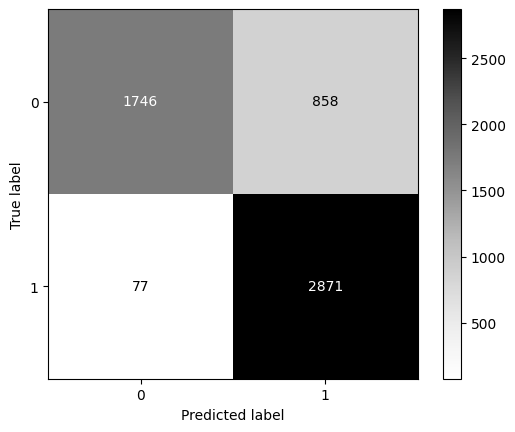

In [179]:
# Model Evaluation of test-set

y_pred_functional2 = model_functional2.predict(X_test_final)
y_pred_functional2 = np.where(y_pred_functional2 >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_functional2))

# confusion matrix

cm = confusion_matrix(y_test, y_pred_functional2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,)
disp.plot(cmap='Greys')
plt.show()

From the evaluation above we know that the improved models it got worse score compared to the base models. It means that this improved models still need hyperparameter tuning again to get a model that better compared to base model.

## 8.5 Summary of Model Evaluation

According to all of the evaluation of 4 models that has been made. Model Sequential Improved is the model that gonna be used on the prediction. With evaluation score of all metrics 93% the models is good enough to be used on to the real life case prediction. This model got the highest recall score too on label 0 (customers who are at risk of churning) and it got the lowest false negative score too so it makes this model predict more accurate about the 'customer not at risk of churning predicted as customers at risk of churning.

# ix. Model Saving

In [180]:
# Creating data inference
df_inf = data.sample(10, random_state=0).sort_index()
print('size of data inference (rows,columns) : ',df_inf.shape)
df_inf.reset_index(drop=True).head(10)

size of data inference (rows,columns) :  (10, 22)


,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,972706cb0db0068e,46,F,Town,Premium Membership,2015-03-27,No,Credit/Debit Card Offers,Smartphone,Mobile_Data,...,1447.387929,11839.58,29.0,727.91,Yes,No,No,Not Applicable,No reason specified,0
1,82d62cc806fb2816,25,M,Town,Premium Membership,2016-09-07,NaN,Without Offers,Smartphone,Wi-Fi,...,114.170000,46885.80,8.0,793.11,No,Yes,Yes,Unsolved,No reason specified,0
2,a596b4679c30ef3e,64,M,NaN,Basic Membership,2017-09-07,Yes,Credit/Debit Card Offers,Smartphone,Wi-Fi,...,204.430000,42224.69,26.0,510.37,Yes,No,Yes,Solved,Too many ads,1
3,8c4761dbf8df1816,52,F,City,Gold Membership,2017-12-31,Yes,NaN,Smartphone,Wi-Fi,...,179.330000,48836.04,20.0,705.00,Yes,No,Yes,Solved in Follow-up,No reason specified,0
4,8f2f492e0c25eb41,60,M,Town,Basic Membership,2015-07-08,Yes,Credit/Debit Card Offers,Smartphone,Wi-Fi,...,38.940000,14104.52,21.0,677.41,Yes,No,Yes,No Information Available,Poor Customer Service,0
5,9bba07c5c386c34c,57,F,City,Silver Membership,2016-06-22,No,Gift Vouchers/Coupons,NaN,Mobile_Data,...,0.000000,8150.90,20.0,793.32,No,Yes,No,Not Applicable,No reason specified,0
6,8a205a969e23299d,17,M,NaN,Gold Membership,2015-05-19,No,Gift Vouchers/Coupons,Desktop,Wi-Fi,...,199.940000,75765.63,0.0,820.17,Yes,No,Yes,Solved,Quality Customer Care,0
7,91607fb18aafbfee,15,M,City,No Membership,2017-11-15,Yes,Gift Vouchers/Coupons,Desktop,Fiber_Optic,...,67.550000,32777.77,23.0,533.44,Yes,No,No,Not Applicable,Poor Customer Service,1
8,847bddd58ff99d7e,32,M,Town,Basic Membership,2016-02-02,Yes,Without Offers,Smartphone,Mobile_Data,...,119.980000,1888.81,28.0,628.93,No,Yes,No,Not Applicable,Too many ads,1
9,8c92ce118df969a1,29,M,Village,Platinum Membership,2016-10-19,No,Credit/Debit Card Offers,NaN,Fiber_Optic,...,145.070000,28873.91,19.0,715.50,No,Yes,No,Not Applicable,Too many ads,0


In [181]:
# Saving data inference as .csv file
df_inf.to_csv('hh8dsft_P2M1_Satriya_Fauzan_Adhim_Inference.csv')

In [182]:
# Save Pipeline
with open('final_pipeline.pkl', 'wb') as file_1:
  pickle.dump(final_pipeline, file_1)
with open('Drop_Columns.txt', 'w') as file_2:
  json.dump(Drop_Columns, file_2)

In [183]:
# Summary of Model Sequential

model_seq2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 96)                1248      
                                                                 
 dropout (Dropout)           (None, 96)                0         
                                                                 
 dense_1 (Dense)             (None, 48)                4656      
                                                                 
 dropout_1 (Dropout)         (None, 48)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 49        
                                                                 
Total params: 5,953
Trainable params: 5,953
Non-trainable params: 0
_________________________________________________________________


In [184]:
# Freeze Model

model_seq2.trainable = False
model_seq2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 96)                1248      
                                                                 
 dropout (Dropout)           (None, 96)                0         
                                                                 
 dense_1 (Dense)             (None, 48)                4656      
                                                                 
 dropout_1 (Dropout)         (None, 48)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 49        
                                                                 
Total params: 5,953
Trainable params: 0
Non-trainable params: 5,953
_________________________________________________________________


In [185]:
# Saving ANN Model

model_seq2.save('model_seq2.h5')

# x. Model Inference

Model Inference terdapat pada notebook lain.

# xi. Conclusion

EDA Conclusion:
1. Amount of customer that gonna churn is higher compared to not churn. Those numbers will have a significant negative impact on the company's business, with churn rate exceeding more than half of the total customers. Based on the data percentage the data distribution appears to be balanced.
2. Majority of churned customers are either non-members or have low membership levels. Based on this data, a business strategy can be developed. For example, offering attractive promotions or offers specifically targeted at customers with low membership levels could be implemented. Additionally, providing promotions like offers for new members can also be effective.
3. Based on the visualization above, it can be observed that the average transaction value for customers who are likely to churn is quite high. Therefore, if this issue is not addressed, the company will face a significant negative impact, particularly in terms of high profit loss.
4. A lot of variables doesn't have really good correlation to variable target. Variables that got strong correlation score to target variable are 'membership_category', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet', and 'feedback'.

Modelling Conclusion

Based on the Model Analysis conducted, it is decided that the improved Sequential model is the best Artificial Neural Network (ANN) modeling approach to predict customer churn risk. The following findings are obtained regarding the model used:
1. With evaluation score of all metrics 93% the models is good enough to be used on to the real life case prediction. 
2. This model got the highest recall score on label 0 (customers who are at risk of churning) and it got the lowest false negative score too so it makes this model predict more accurate about the 'customer not at risk of churning predicted as customers at risk of churning.

Business Insight:
1. Offering attractive promotions or offers specifically targeted at customers with low membership levels could be implemented. Additionally, providing promotions like offers for new members can also be effective.
2. By targeting specific segments, the business can aim to retain existing customers with low membership levels and attract new customers through enticing offers. It is important to create personalized and compelling incentives to encourage customer loyalty and minimize churn.
3. The company could consider implementing retention strategies specifically targeting high-value customers. These strategies could include personalized offers, loyalty programs, or enhanced customer service tailored to their needs. By providing incentives and a positive customer experience, the company can encourage these customers to remain loyal and continue making high-value transactions.

For the modelling that has been made the modeling process can indeed be further improved, particularly in terms of hyperparameter tuning. Searching more optimal paramaters that can be used, potentially leading to better performance of the model.

Hyperparameter tuning is a crucial step in optimizing the model's performance. By systematically varying hyperparameters and evaluating the model's performance on validation data.

If more time can be putted for hyperparameter tunings, its not impossible to get more accurate models that can predict Customer Churn better. 

